In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_ManagedMoney_NetPosition_to_openinterest_change',
                    'forward_ManagedMoney_LongPosition_to_openinterest_change',
                    'forward_ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=5,
                           k=1,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("wti_cot_mm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_ManagedMoney_NetPosition_change': ['F2_RolledPrice_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change',
  'prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change'],
 'forward_report_ManagedMoney_LongPosition_change': ['F2_RolledPrice_change',
  'prior_5D_F1_OI_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change'],
 'forward_report_ManagedMoney_ShortPosition_change': ['F2_RolledPrice_rolling_20D_volatility',
  'F2_RolledPrice_change'],
 'forward_ManagedMoney_NetPosition_to_openinterest_change': ['prior_5D_F1MinusF2_openinterest_change',
  'F2_RolledPrice_rolling_20D_volatility',
  'prior_5D_F2_OI_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_report_ManagedMon

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2026-01-29 22:06:58,375] A new study created in memory with name: no-name-09b48a6e-2c51-4af1-b1c6-a4352736e6d5
Best trial: 0. Best value: 0.0336807:   1%|      | 1/80 [00:03<04:19,  3.29s/it]

[I 2026-01-29 22:07:01,667] Trial 0 finished with value: 0.033680721610501355 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.033680721610501355.


Best trial: 1. Best value: 0.033704:   2%|▏      | 2/80 [00:04<02:56,  2.27s/it]

[I 2026-01-29 22:07:03,203] Trial 1 finished with value: 0.03370403826794671 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.03370403826794671.


Best trial: 2. Best value: 0.10982:   4%|▎       | 3/80 [00:08<03:39,  2.85s/it]

[I 2026-01-29 22:07:06,746] Trial 2 finished with value: 0.10981967644155324 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.10981967644155324.


Best trial: 2. Best value: 0.10982:   5%|▍       | 4/80 [00:08<02:21,  1.86s/it]

[I 2026-01-29 22:07:07,100] Trial 3 finished with value: 0.08284529048624607 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.10981967644155324.


Best trial: 2. Best value: 0.10982:   6%|▌       | 5/80 [00:10<02:07,  1.70s/it]

[I 2026-01-29 22:07:08,529] Trial 4 finished with value: 0.033702644757681484 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.10981967644155324.


Best trial: 2. Best value: 0.10982:   9%|▋       | 7/80 [00:12<02:08,  1.76s/it]

[I 2026-01-29 22:07:10,411] Trial 5 finished with value: 0.03370403956979548 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.10981967644155324.
[I 2026-01-29 22:07:10,444] Trial 6 finished with value: -0.020848966532326842 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.10981967644155324.
[I 2026-01-29 22:07:10,461] Trial 7 finished with value: 0.03370403956979548 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.10981967644155324.


Best trial: 2. Best value: 0.10982:  11%|▉       | 9/80 [00:12<00:58,  1.22it/s]

[I 2026-01-29 22:07:10,921] Trial 8 finished with value: 0.08993248835902103 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.10981967644155324.
[I 2026-01-29 22:07:10,940] Trial 9 finished with value: 0.03370403956979548 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.10981967644155324.


Best trial: 10. Best value: 0.110006:  14%|▋    | 11/80 [00:14<00:57,  1.20it/s]

[I 2026-01-29 22:07:12,631] Trial 10 finished with value: 0.11000578787218471 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.11000578787218471.


Best trial: 10. Best value: 0.110006:  15%|▊    | 12/80 [00:16<01:12,  1.06s/it]

[I 2026-01-29 22:07:14,576] Trial 11 finished with value: 0.11000578787218468 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.11000578787218471.


Best trial: 10. Best value: 0.110006:  16%|▊    | 13/80 [00:18<01:30,  1.35s/it]

[I 2026-01-29 22:07:16,918] Trial 12 finished with value: 0.11000578787218471 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.11000578787218471.


Best trial: 13. Best value: 0.114699:  18%|▉    | 14/80 [00:19<01:23,  1.27s/it]

[I 2026-01-29 22:07:17,951] Trial 13 finished with value: 0.11469898872554753 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.11469898872554753.


Best trial: 14. Best value: 0.123621:  19%|▉    | 15/80 [00:21<01:32,  1.42s/it]

[I 2026-01-29 22:07:19,786] Trial 14 finished with value: 0.12362128452093499 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.12362128452093499.


Best trial: 14. Best value: 0.123621:  20%|█    | 16/80 [00:23<01:41,  1.59s/it]

[I 2026-01-29 22:07:21,811] Trial 15 finished with value: 0.1224505814443409 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.12362128452093499.


Best trial: 14. Best value: 0.123621:  21%|█    | 17/80 [00:25<01:56,  1.85s/it]

[I 2026-01-29 22:07:24,372] Trial 16 finished with value: 0.11125781851519019 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.12362128452093499.


Best trial: 14. Best value: 0.123621:  22%|█▏   | 18/80 [00:28<01:58,  1.92s/it]

[I 2026-01-29 22:07:26,454] Trial 17 finished with value: 0.12201498231088452 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.12362128452093499.


Best trial: 14. Best value: 0.123621:  24%|█▏   | 19/80 [00:29<01:51,  1.83s/it]

[I 2026-01-29 22:07:28,070] Trial 18 finished with value: 0.11769884451567521 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.12362128452093499.


Best trial: 19. Best value: 0.135351:  25%|█▎   | 20/80 [00:30<01:23,  1.39s/it]

[I 2026-01-29 22:07:28,384] Trial 19 finished with value: 0.13535067915424562 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.13535067915424562.
[I 2026-01-29 22:07:28,405] Trial 20 finished with value: 0.03370403940219118 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 19 with value: 0.13535067915424562.


Best trial: 19. Best value: 0.135351:  28%|█▍   | 22/80 [00:30<00:50,  1.16it/s]

[I 2026-01-29 22:07:28,865] Trial 21 finished with value: 0.1262227609744417 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.13535067915424562.


Best trial: 19. Best value: 0.135351:  29%|█▍   | 23/80 [00:30<00:42,  1.33it/s]

[I 2026-01-29 22:07:29,260] Trial 22 finished with value: 0.11772571836932728 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.13535067915424562.


Best trial: 19. Best value: 0.135351:  30%|█▌   | 24/80 [00:31<00:38,  1.47it/s]

[I 2026-01-29 22:07:29,740] Trial 23 finished with value: 0.11587421450736335 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.13535067915424562.
[I 2026-01-29 22:07:29,768] Trial 24 finished with value: 0.027960058875258317 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 19 with value: 0.13535067915424562.


Best trial: 19. Best value: 0.135351:  32%|█▋   | 26/80 [00:31<00:25,  2.13it/s]

[I 2026-01-29 22:07:30,116] Trial 25 finished with value: 0.11385907067124379 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.13535067915424562.


Best trial: 26. Best value: 0.138717:  34%|█▋   | 27/80 [00:32<00:25,  2.05it/s]

[I 2026-01-29 22:07:30,658] Trial 26 finished with value: 0.13871660079491516 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  35%|█▊   | 28/80 [00:32<00:27,  1.87it/s]

[I 2026-01-29 22:07:31,340] Trial 27 finished with value: 0.11446787036221963 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  39%|█▉   | 31/80 [00:33<00:18,  2.58it/s]

[I 2026-01-29 22:07:32,239] Trial 28 finished with value: 0.11837418280459681 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:32,295] Trial 29 finished with value: 0.03351171009939809 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:32,362] Trial 30 finished with value: 0.0050483674954101805 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  40%|██   | 32/80 [00:34<00:22,  2.12it/s]

[I 2026-01-29 22:07:33,104] Trial 31 finished with value: 0.13871660079491507 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:33,170] Trial 32 finished with value: 0.023270585598672528 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  42%|██▏  | 34/80 [00:35<00:21,  2.14it/s]

[I 2026-01-29 22:07:34,035] Trial 33 finished with value: 0.13561130572396407 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  44%|██▏  | 35/80 [00:36<00:24,  1.86it/s]

[I 2026-01-29 22:07:34,820] Trial 34 finished with value: 0.11382131944273054 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  46%|██▎  | 37/80 [00:37<00:26,  1.64it/s]

[I 2026-01-29 22:07:35,656] Trial 35 finished with value: 0.11126300863167857 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:35,710] Trial 36 finished with value: 0.017887832105514968 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:35,732] Trial 37 finished with value: 0.03370400554297509 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  49%|██▍  | 39/80 [00:38<00:17,  2.31it/s]

[I 2026-01-29 22:07:36,439] Trial 38 finished with value: 0.1263259304481659 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  51%|██▌  | 41/80 [00:39<00:21,  1.79it/s]

[I 2026-01-29 22:07:38,082] Trial 39 finished with value: 0.10274772146967322 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:38,252] Trial 40 finished with value: 0.03370403956979548 and parameters: {'model': 'ols'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  52%|██▋  | 42/80 [00:40<00:22,  1.70it/s]

[I 2026-01-29 22:07:38,911] Trial 41 finished with value: 0.12055475827596969 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  54%|██▋  | 43/80 [00:41<00:22,  1.67it/s]

[I 2026-01-29 22:07:39,582] Trial 42 finished with value: 0.1356113057239641 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  55%|██▊  | 44/80 [00:41<00:23,  1.54it/s]

[I 2026-01-29 22:07:40,340] Trial 43 finished with value: 0.13561130572396407 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  56%|██▊  | 45/80 [00:42<00:22,  1.58it/s]

[I 2026-01-29 22:07:40,948] Trial 44 finished with value: 0.11484336392899495 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  57%|██▉  | 46/80 [00:43<00:27,  1.25it/s]

[I 2026-01-29 22:07:42,181] Trial 45 finished with value: 0.1173099479840323 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  61%|███  | 49/80 [00:45<00:16,  1.93it/s]

[I 2026-01-29 22:07:43,286] Trial 46 finished with value: 0.11194954081853074 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:43,390] Trial 47 finished with value: 0.033493052942510065 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:43,426] Trial 48 finished with value: 0.03370403956979548 and parameters: {'model': 'ols'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:43,451] Trial 49 finished with value: 0.027960023235458892 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  64%|███▏ | 51/80 [00:45<00:13,  2.22it/s]

[I 2026-01-29 22:07:44,108] Trial 50 finished with value: 0.13389503522240084 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  65%|███▎ | 52/80 [00:46<00:12,  2.22it/s]

[I 2026-01-29 22:07:44,566] Trial 51 finished with value: 0.13535067915424556 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  66%|███▎ | 53/80 [00:46<00:11,  2.30it/s]

[I 2026-01-29 22:07:44,945] Trial 52 finished with value: 0.13385285809473446 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  68%|███▍ | 54/80 [00:47<00:14,  1.76it/s]

[I 2026-01-29 22:07:45,852] Trial 53 finished with value: 0.11839622552983721 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  69%|███▍ | 55/80 [00:48<00:18,  1.33it/s]

[I 2026-01-29 22:07:47,161] Trial 54 finished with value: 0.11589640736763854 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  70%|███▌ | 56/80 [00:49<00:17,  1.36it/s]

[I 2026-01-29 22:07:47,855] Trial 55 finished with value: 0.13561130572396407 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  71%|███▌ | 57/80 [00:50<00:18,  1.24it/s]

[I 2026-01-29 22:07:48,849] Trial 56 finished with value: 0.049106894516973754 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  72%|███▋ | 58/80 [00:51<00:21,  1.04it/s]

[I 2026-01-29 22:07:50,191] Trial 57 finished with value: 0.11126402288140547 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  74%|███▋ | 59/80 [00:52<00:20,  1.03it/s]

[I 2026-01-29 22:07:51,180] Trial 58 finished with value: 0.1231734576691289 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  75%|███▊ | 60/80 [00:53<00:19,  1.00it/s]

[I 2026-01-29 22:07:52,222] Trial 59 finished with value: 0.11516441236723052 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  76%|███▊ | 61/80 [00:55<00:20,  1.08s/it]

[I 2026-01-29 22:07:53,508] Trial 60 finished with value: 0.1106498696897349 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  78%|███▉ | 62/80 [00:55<00:17,  1.04it/s]

[I 2026-01-29 22:07:54,195] Trial 61 finished with value: 0.13561130572396407 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  79%|███▉ | 63/80 [00:56<00:15,  1.11it/s]

[I 2026-01-29 22:07:54,942] Trial 62 finished with value: 0.13561130572396402 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  80%|████ | 64/80 [00:57<00:12,  1.24it/s]

[I 2026-01-29 22:07:55,534] Trial 63 finished with value: 0.13636546180782796 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  81%|████ | 65/80 [00:58<00:12,  1.20it/s]

[I 2026-01-29 22:07:56,421] Trial 64 finished with value: 0.11602445546493072 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:56,479] Trial 65 finished with value: 0.03370007918844139 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  84%|████▏| 67/80 [00:58<00:07,  1.68it/s]

[I 2026-01-29 22:07:57,074] Trial 66 finished with value: 0.1129564817218558 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:57,096] Trial 67 finished with value: 0.03370403956979548 and parameters: {'model': 'ols'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  86%|████▎| 69/80 [00:59<00:05,  1.93it/s]

[I 2026-01-29 22:07:57,874] Trial 68 finished with value: 0.11688388078572108 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:07:57,940] Trial 69 finished with value: -0.004813436330240372 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  89%|████▍| 71/80 [01:00<00:04,  2.12it/s]

[I 2026-01-29 22:07:58,661] Trial 70 finished with value: 0.12180731474297227 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  90%|████▌| 72/80 [01:00<00:04,  1.94it/s]

[I 2026-01-29 22:07:59,336] Trial 71 finished with value: 0.13746921324082945 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  91%|████▌| 73/80 [01:01<00:03,  1.80it/s]

[I 2026-01-29 22:08:00,007] Trial 72 finished with value: 0.13746921324082945 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  92%|████▋| 74/80 [01:02<00:03,  1.71it/s]

[I 2026-01-29 22:08:00,713] Trial 73 finished with value: 0.13746921324082945 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  94%|████▋| 75/80 [01:02<00:02,  1.71it/s]

[I 2026-01-29 22:08:01,284] Trial 74 finished with value: 0.11819342016939385 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:08:01,335] Trial 75 finished with value: 0.03198711650823944 and parameters: {'model': 'ridge', 'alpha': 62.109211583771376}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  96%|████▊| 77/80 [01:04<00:01,  1.73it/s]

[I 2026-01-29 22:08:02,435] Trial 76 finished with value: 0.12299764099501738 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717:  98%|████▉| 78/80 [01:04<00:01,  1.90it/s]

[I 2026-01-29 22:08:02,789] Trial 77 finished with value: 0.12622276097444166 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
[I 2026-01-29 22:08:02,852] Trial 78 finished with value: 0.03370403396479214 and parameters: {'model': 'lasso', 'alpha': 0.0002780475574146242}. Best is trial 26 with value: 0.13871660079491516.


Best trial: 26. Best value: 0.138717: 100%|█████| 80/80 [01:05<00:00,  1.22it/s]
[I 2026-01-29 22:08:04,067] A new study created in memory with name: no-name-b33a8fed-dcd4-48cb-b550-836bdb2b8337


[I 2026-01-29 22:08:04,018] Trial 79 finished with value: 0.1115589807298682 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.13871660079491516.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.0335, params={'model': 'lasso', 'alpha': 9.409741456225913}
ridge: score=0.0179, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1098, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}
hgbm: score=0.0491, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.0337, params={'model': 'ols'}
enet: score=-0.0208, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss'

Best trial: 0. Best value: 0.0150298:   1%|      | 1/80 [00:00<00:07, 10.57it/s]

[I 2026-01-29 22:08:04,111] Trial 0 finished with value: 0.015029831158960888 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.015029831158960888.
[I 2026-01-29 22:08:04,175] Trial 1 finished with value: 0.015187499281887621 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.015187499281887621.


Best trial: 3. Best value: 0.122815:   5%|▎      | 4/80 [00:02<00:50,  1.51it/s]

[I 2026-01-29 22:08:06,224] Trial 2 finished with value: 0.10592351070663936 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.10592351070663936.
[I 2026-01-29 22:08:06,380] Trial 3 finished with value: 0.1228148972843434 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:06,397] Trial 4 finished with value: 0.015175344041205165 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  10%|▋      | 8/80 [00:02<00:27,  2.59it/s]

[I 2026-01-29 22:08:06,469] Trial 5 finished with value: 0.015187510646490175 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:06,535] Trial 6 finished with value: -0.03043704289565495 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:06,582] Trial 7 finished with value: 0.015187510646490175 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:06,681] Trial 8 finished with value: 0.11791991295155675 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  14%|▊     | 11/80 [00:02<00:13,  5.18it/s]

[I 2026-01-29 22:08:06,756] Trial 9 finished with value: 0.015187510646490175 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:06,929] Trial 10 finished with value: 0.1176685892246238 and parameters: {'model': 'hgbm', 'learning_rate': 0.19607453433561617, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9725221759846352, 'max_leaf_nodes': 222}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  14%|▊     | 11/80 [00:03<00:13,  5.18it/s]

[I 2026-01-29 22:08:07,234] Trial 11 finished with value: 0.12061587362342699 and parameters: {'model': 'hgbm', 'learning_rate': 0.03804813682808826, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.2807609542397042, 'max_leaf_nodes': 79}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  16%|▉     | 13/80 [00:03<00:15,  4.19it/s]

[I 2026-01-29 22:08:07,610] Trial 12 finished with value: 0.10291510896447376 and parameters: {'model': 'hgbm', 'learning_rate': 0.03349008160186631, 'max_depth': 8, 'max_iter': 300, 'l2_regularization': 0.6247574385516161, 'max_leaf_nodes': 48}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  18%|█     | 14/80 [00:07<00:57,  1.14it/s]

[I 2026-01-29 22:08:11,328] Trial 13 finished with value: 0.06375104022793156 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  19%|█▏    | 15/80 [00:08<00:56,  1.15it/s]

[I 2026-01-29 22:08:12,159] Trial 14 finished with value: 0.08693477955268354 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015078832504018204, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.02935037889036246, 'max_leaf_nodes': 138}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  20%|█▏    | 16/80 [00:09<00:57,  1.10it/s]

[I 2026-01-29 22:08:13,197] Trial 15 finished with value: 0.06304442969907544 and parameters: {'model': 'hgbm', 'learning_rate': 0.15609307505804748, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.5554919051642802, 'max_leaf_nodes': 134}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  21%|█▎    | 17/80 [00:09<00:53,  1.17it/s]

[I 2026-01-29 22:08:13,897] Trial 16 finished with value: 0.1056679579660213 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  24%|█▍    | 19/80 [00:12<01:13,  1.21s/it]

[I 2026-01-29 22:08:16,083] Trial 17 finished with value: 0.08768946480461709 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:16,140] Trial 18 finished with value: 0.011765285997641773 and parameters: {'model': 'enet', 'alpha': 1.5375665479416203e-06, 'l1_ratio': 0.9692698520487181, 'loss': 'squared_error'}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:16,188] Trial 19 finished with value: 0.014132284165243784 and parameters: {'model': 'lasso', 'alpha': 7.564898361977755}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 3. Best value: 0.122815:  28%|█▋    | 22/80 [00:12<00:34,  1.68it/s]

[I 2026-01-29 22:08:16,865] Trial 20 finished with value: 0.11092127115891938 and parameters: {'model': 'hgbm', 'learning_rate': 0.011422779133541809, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.2847132849495765, 'max_leaf_nodes': 15}. Best is trial 3 with value: 0.1228148972843434.
[I 2026-01-29 22:08:17,037] Trial 21 finished with value: 0.11617687802072481 and parameters: {'model': 'hgbm', 'learning_rate': 0.03610316808126242, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3079103459436354, 'max_leaf_nodes': 101}. Best is trial 3 with value: 0.1228148972843434.


Best trial: 22. Best value: 0.130627:  29%|█▍   | 23/80 [00:13<00:30,  1.88it/s]

[I 2026-01-29 22:08:17,323] Trial 22 finished with value: 0.13062707525358844 and parameters: {'model': 'hgbm', 'learning_rate': 0.049617814039029595, 'max_depth': 6, 'max_iter': 100, 'l2_regularization': 0.31992870438290716, 'max_leaf_nodes': 89}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  30%|█▌   | 24/80 [00:13<00:26,  2.15it/s]

[I 2026-01-29 22:08:17,602] Trial 23 finished with value: 0.1040884004058418 and parameters: {'model': 'hgbm', 'learning_rate': 0.09126898808148447, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.7958677618935733, 'max_leaf_nodes': 83}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  31%|█▌   | 25/80 [00:14<00:30,  1.80it/s]

[I 2026-01-29 22:08:18,388] Trial 24 finished with value: 0.12350024874134445 and parameters: {'model': 'hgbm', 'learning_rate': 0.010760522593487701, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.15967694059783516, 'max_leaf_nodes': 148}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  32%|█▋   | 26/80 [00:15<00:34,  1.54it/s]

[I 2026-01-29 22:08:19,296] Trial 25 finished with value: 0.12586936638812765 and parameters: {'model': 'hgbm', 'learning_rate': 0.006577203138347966, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.0741546339380279, 'max_leaf_nodes': 176}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  36%|█▊   | 29/80 [00:16<00:22,  2.29it/s]

[I 2026-01-29 22:08:20,171] Trial 26 finished with value: 0.12981269536918702 and parameters: {'model': 'hgbm', 'learning_rate': 0.006955049306217821, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.03899699940316706, 'max_leaf_nodes': 176}. Best is trial 22 with value: 0.13062707525358844.
[I 2026-01-29 22:08:20,242] Trial 27 finished with value: -0.014518438294747206 and parameters: {'model': 'ridge', 'alpha': 933.6044419798662}. Best is trial 22 with value: 0.13062707525358844.
[I 2026-01-29 22:08:20,348] Trial 28 finished with value: 0.015187487262406672 and parameters: {'model': 'lasso', 'alpha': 0.00017225928349038876}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  38%|█▉   | 30/80 [00:16<00:23,  2.16it/s]

[I 2026-01-29 22:08:20,906] Trial 29 finished with value: 0.07549477171763906 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.13062707525358844.
[I 2026-01-29 22:08:20,991] Trial 30 finished with value: 0.00608244322819419 and parameters: {'model': 'enet', 'alpha': 1.0118805022401518e-06, 'l1_ratio': 0.044647688631352045, 'loss': 'huber', 'epsilon': 0.19221454626964704}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  40%|██   | 32/80 [00:17<00:23,  2.03it/s]

[I 2026-01-29 22:08:21,987] Trial 31 finished with value: 0.12611714086602882 and parameters: {'model': 'hgbm', 'learning_rate': 0.0062619518211125425, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.0501355685497703, 'max_leaf_nodes': 177}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  41%|██   | 33/80 [00:19<00:32,  1.47it/s]

[I 2026-01-29 22:08:23,312] Trial 32 finished with value: 0.11892256722099223 and parameters: {'model': 'hgbm', 'learning_rate': 0.004241383079060173, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.028737218602766124, 'max_leaf_nodes': 190}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  42%|██▏  | 34/80 [00:20<00:34,  1.33it/s]

[I 2026-01-29 22:08:24,283] Trial 33 finished with value: 0.12608961365286878 and parameters: {'model': 'hgbm', 'learning_rate': 0.004855971408033909, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.09794476917416832, 'max_leaf_nodes': 181}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  44%|██▏  | 35/80 [00:21<00:41,  1.10it/s]

[I 2026-01-29 22:08:25,658] Trial 34 finished with value: 0.08186635223654588 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  46%|██▎  | 37/80 [00:22<00:26,  1.61it/s]

[I 2026-01-29 22:08:26,207] Trial 35 finished with value: 0.07940590972090757 and parameters: {'model': 'hgbm', 'learning_rate': 0.002956947561284982, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.13824612728893443, 'max_leaf_nodes': 180}. Best is trial 22 with value: 0.13062707525358844.
[I 2026-01-29 22:08:26,324] Trial 36 finished with value: 0.015187452335100077 and parameters: {'model': 'lasso', 'alpha': 0.0004294006360108364}. Best is trial 22 with value: 0.13062707525358844.
[I 2026-01-29 22:08:26,362] Trial 37 finished with value: 0.0004686316792351578 and parameters: {'model': 'ridge', 'alpha': 211.90353887657093}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  49%|██▍  | 39/80 [00:23<00:23,  1.78it/s]

[I 2026-01-29 22:08:27,291] Trial 38 finished with value: 0.12147930366390952 and parameters: {'model': 'hgbm', 'learning_rate': 0.004590286729607674, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.1817842446696173, 'max_leaf_nodes': 215}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 22. Best value: 0.130627:  50%|██▌  | 40/80 [00:25<00:37,  1.06it/s]

[I 2026-01-29 22:08:29,434] Trial 39 finished with value: 0.09805914065104446 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 0.13062707525358844.
[I 2026-01-29 22:08:29,485] Trial 40 finished with value: 0.015187510646490175 and parameters: {'model': 'ols'}. Best is trial 22 with value: 0.13062707525358844.


Best trial: 41. Best value: 0.131946:  52%|██▋  | 42/80 [00:26<00:31,  1.21it/s]

[I 2026-01-29 22:08:30,759] Trial 41 finished with value: 0.13194613900243657 and parameters: {'model': 'hgbm', 'learning_rate': 0.007369203003553593, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.005441357686730243, 'max_leaf_nodes': 175}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  54%|██▋  | 43/80 [00:27<00:33,  1.11it/s]

[I 2026-01-29 22:08:31,908] Trial 42 finished with value: 0.12871282676080498 and parameters: {'model': 'hgbm', 'learning_rate': 0.008518204150092891, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.005043646500310112, 'max_leaf_nodes': 165}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  55%|██▊  | 44/80 [00:29<00:36,  1.02s/it]

[I 2026-01-29 22:08:33,280] Trial 43 finished with value: 0.1103364953934037 and parameters: {'model': 'hgbm', 'learning_rate': 0.010586632441007457, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.015296237393506296, 'max_leaf_nodes': 160}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  56%|██▊  | 45/80 [00:30<00:38,  1.09s/it]

[I 2026-01-29 22:08:34,600] Trial 44 finished with value: 0.1041855476894033 and parameters: {'model': 'hgbm', 'learning_rate': 0.019082058142950328, 'max_depth': 6, 'max_iter': 700, 'l2_regularization': 0.46043864513600785, 'max_leaf_nodes': 192}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  57%|██▉  | 46/80 [00:31<00:33,  1.02it/s]

[I 2026-01-29 22:08:35,281] Trial 45 finished with value: 0.12235814757877891 and parameters: {'model': 'hgbm', 'learning_rate': 0.0076308256995276606, 'max_depth': 4, 'max_iter': 600, 'l2_regularization': 0.0017058234761013302, 'max_leaf_nodes': 161}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  61%|███  | 49/80 [00:32<00:32,  1.06s/it]

[I 2026-01-29 22:08:36,531] Trial 46 finished with value: 0.1009577128528905 and parameters: {'model': 'hgbm', 'learning_rate': 0.0025355068345424246, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.20933866597448023, 'max_leaf_nodes': 206}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:08:36,550] Trial 47 finished with value: 0.015187510646490175 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:08:36,570] Trial 48 finished with value: 0.015180083985387578 and parameters: {'model': 'ridge', 'alpha': 0.02924807829977882}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:08:36,594] Trial 49 finished with value: 0.011765249110331137 and parameters: {'model': 'enet', 'alpha': 1.0879946025445147e-05, 'l1_ratio': 0.944945129431989, 'loss': 'squared_error'}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  64%|███▏ | 51/80 [00:34<00:19,  1.50it/s]

[I 2026-01-29 22:08:38,224] Trial 50 finished with value: 0.09035758600950068 and parameters: {'model': 'hgbm', 'learning_rate': 0.020544467765799997, 'max_depth': 8, 'max_iter': 900, 'l2_regularization': 0.10955349118172897, 'max_leaf_nodes': 239}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  65%|███▎ | 52/80 [00:34<00:18,  1.48it/s]

[I 2026-01-29 22:08:38,925] Trial 51 finished with value: 0.12157164220978801 and parameters: {'model': 'hgbm', 'learning_rate': 0.005959563702262829, 'max_depth': 4, 'max_iter': 800, 'l2_regularization': 0.0945975885161694, 'max_leaf_nodes': 172}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  66%|███▎ | 53/80 [00:35<00:20,  1.31it/s]

[I 2026-01-29 22:08:40,045] Trial 52 finished with value: 0.10965985308661869 and parameters: {'model': 'hgbm', 'learning_rate': 0.0033479516090346097, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.4216410000853663, 'max_leaf_nodes': 200}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  68%|███▍ | 54/80 [00:36<00:19,  1.34it/s]

[I 2026-01-29 22:08:40,728] Trial 53 finished with value: 0.12781373964403622 and parameters: {'model': 'hgbm', 'learning_rate': 0.00725239554166162, 'max_depth': 5, 'max_iter': 600, 'l2_regularization': 0.08147824723486172, 'max_leaf_nodes': 159}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  69%|███▍ | 55/80 [00:37<00:19,  1.29it/s]

[I 2026-01-29 22:08:41,602] Trial 54 finished with value: 0.11949489711331504 and parameters: {'model': 'hgbm', 'learning_rate': 0.009280124575421966, 'max_depth': 7, 'max_iter': 600, 'l2_regularization': 0.0034038112981384858, 'max_leaf_nodes': 159}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  70%|███▌ | 56/80 [00:38<00:22,  1.05it/s]

[I 2026-01-29 22:08:42,972] Trial 55 finished with value: 0.07268214568670613 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  71%|███▌ | 57/80 [00:40<00:23,  1.03s/it]

[I 2026-01-29 22:08:44,316] Trial 56 finished with value: 0.09719003226205776 and parameters: {'model': 'hgbm', 'learning_rate': 0.014565851056035568, 'max_depth': 8, 'max_iter': 700, 'l2_regularization': 0.2283957473879112, 'max_leaf_nodes': 116}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  72%|███▋ | 58/80 [00:40<00:18,  1.18it/s]

[I 2026-01-29 22:08:44,684] Trial 57 finished with value: 0.11473911266744408 and parameters: {'model': 'hgbm', 'learning_rate': 0.007050097388926505, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.0765922844629954, 'max_leaf_nodes': 156}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  74%|███▋ | 59/80 [00:41<00:16,  1.25it/s]

[I 2026-01-29 22:08:45,368] Trial 58 finished with value: 0.1140993161306259 and parameters: {'model': 'hgbm', 'learning_rate': 0.014508947548897474, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.14836329901755696, 'max_leaf_nodes': 130}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:08:45,389] Trial 59 finished with value: 0.01518724951910096 and parameters: {'model': 'lasso', 'alpha': 0.001923469150517157}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  76%|███▊ | 61/80 [00:42<00:12,  1.58it/s]

[I 2026-01-29 22:08:46,217] Trial 60 finished with value: 0.0862904852189964 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018279727813176384, 'max_depth': 6, 'max_iter': 600, 'l2_regularization': 0.37388322324217427, 'max_leaf_nodes': 172}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  78%|███▉ | 62/80 [00:42<00:12,  1.46it/s]

[I 2026-01-29 22:08:47,071] Trial 61 finished with value: 0.12456952149678026 and parameters: {'model': 'hgbm', 'learning_rate': 0.004857705145257726, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.07837531038967635, 'max_leaf_nodes': 184}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  79%|███▉ | 63/80 [00:44<00:14,  1.21it/s]

[I 2026-01-29 22:08:48,311] Trial 62 finished with value: 0.12181556896145296 and parameters: {'model': 'hgbm', 'learning_rate': 0.005480461741497181, 'max_depth': 7, 'max_iter': 800, 'l2_regularization': 0.07370838463594157, 'max_leaf_nodes': 147}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  80%|████ | 64/80 [00:44<00:12,  1.24it/s]

[I 2026-01-29 22:08:49,057] Trial 63 finished with value: 0.07606187183111003 and parameters: {'model': 'hgbm', 'learning_rate': 0.06723930734709511, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.1106481120280095, 'max_leaf_nodes': 170}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  81%|████ | 65/80 [00:46<00:16,  1.08s/it]

[I 2026-01-29 22:08:50,842] Trial 64 finished with value: 0.1051162302473308 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  85%|████▎| 68/80 [00:48<00:08,  1.46it/s]

[I 2026-01-29 22:08:52,334] Trial 65 finished with value: 0.12048451293355346 and parameters: {'model': 'hgbm', 'learning_rate': 0.00859995881246594, 'max_depth': 6, 'max_iter': 900, 'l2_regularization': 0.0537497778203685, 'max_leaf_nodes': 199}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:08:52,394] Trial 66 finished with value: 0.015187510646490175 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:08:52,444] Trial 67 finished with value: 0.006077182814878222 and parameters: {'model': 'enet', 'alpha': 8.148367709757886e-06, 'l1_ratio': 0.5801520803414412, 'loss': 'huber', 'epsilon': 0.14337254417753625}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  86%|████▎| 69/80 [00:49<00:08,  1.28it/s]

[I 2026-01-29 22:08:53,533] Trial 68 finished with value: 0.12088429439986552 and parameters: {'model': 'hgbm', 'learning_rate': 0.0040113524070233735, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.24775120801370465, 'max_leaf_nodes': 184}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  88%|████▍| 70/80 [00:51<00:10,  1.06s/it]

[I 2026-01-29 22:08:55,404] Trial 69 finished with value: 0.08395775859893406 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  89%|████▍| 71/80 [00:51<00:08,  1.05it/s]

[I 2026-01-29 22:08:56,036] Trial 70 finished with value: 0.0626947781691201 and parameters: {'model': 'hgbm', 'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.18297228851357758, 'max_leaf_nodes': 57}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  90%|████▌| 72/80 [00:52<00:07,  1.08it/s]

[I 2026-01-29 22:08:56,904] Trial 71 finished with value: 0.12572079153041904 and parameters: {'model': 'hgbm', 'learning_rate': 0.006518165965798605, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.05883971131574296, 'max_leaf_nodes': 173}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  91%|████▌| 73/80 [00:53<00:05,  1.20it/s]

[I 2026-01-29 22:08:57,509] Trial 72 finished with value: 0.12514722378483464 and parameters: {'model': 'hgbm', 'learning_rate': 0.006668782030658467, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.12421480953735611, 'max_leaf_nodes': 148}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  92%|████▋| 74/80 [00:54<00:04,  1.22it/s]

[I 2026-01-29 22:08:58,294] Trial 73 finished with value: 0.12228662867818407 and parameters: {'model': 'hgbm', 'learning_rate': 0.00810554493375058, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.005554990048427515, 'max_leaf_nodes': 169}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:08:58,335] Trial 74 finished with value: 0.014639861888375332 and parameters: {'model': 'ridge', 'alpha': 2.238998155928214}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  95%|████▊| 76/80 [00:54<00:02,  1.65it/s]

[I 2026-01-29 22:08:58,990] Trial 75 finished with value: 0.12937962013386528 and parameters: {'model': 'hgbm', 'learning_rate': 0.01371528597333947, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.060177094257627003, 'max_leaf_nodes': 182}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  96%|████▊| 77/80 [00:55<00:01,  1.66it/s]

[I 2026-01-29 22:08:59,589] Trial 76 finished with value: 0.12572755176444497 and parameters: {'model': 'hgbm', 'learning_rate': 0.013195402283611529, 'max_depth': 3, 'max_iter': 900, 'l2_regularization': 0.0493515554009647, 'max_leaf_nodes': 188}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946:  98%|████▉| 78/80 [00:56<00:01,  1.55it/s]

[I 2026-01-29 22:09:00,327] Trial 77 finished with value: 0.09748603287107417 and parameters: {'model': 'hgbm', 'learning_rate': 0.029299399753969523, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.35474996962896654, 'max_leaf_nodes': 218}. Best is trial 41 with value: 0.13194613900243657.
[I 2026-01-29 22:09:00,396] Trial 78 finished with value: 0.015151847977225947 and parameters: {'model': 'lasso', 'alpha': 0.2623883352024325}. Best is trial 41 with value: 0.13194613900243657.


Best trial: 41. Best value: 0.131946: 100%|█████| 80/80 [00:59<00:00,  1.34it/s]
[I 2026-01-29 22:09:03,646] A new study created in memory with name: no-name-994d741d-d6a1-4b94-b102-a72a96cbc265


[I 2026-01-29 22:09:03,614] Trial 79 finished with value: 0.10437352379678816 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 19, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 41 with value: 0.13194613900243657.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.007369203003553593, 'max_depth': 6, 'max_iter': 800, 'l2_regularization': 0.005441357686730243, 'max_leaf_nodes': 175}

Best Per Model:
lasso: score=0.0141, params={'model': 'lasso', 'alpha': 7.564898361977755}
ridge: score=-0.0145, params={'model': 'ridge', 'alpha': 933.6044419798662}
rf: score=0.0755, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
hgbm: score=0.0627, params={'model': 'hgbm', 'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.18297228851357758, 'max_leaf_nodes': 57}
ols: score=0.0152, params={'model': 'ols'}
enet: score=-0.0304, params={'model': 'enet', 'alpha': 0.0139

Best trial: 1. Best value: -0.0016477:   1%|     | 1/80 [00:00<00:05, 15.33it/s]

[I 2026-01-29 22:09:03,694] Trial 0 finished with value: -0.001686811963556012 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.001686811963556012.
[I 2026-01-29 22:09:03,712] Trial 1 finished with value: -0.0016477037445188681 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: -0.0016477037445188681.


Best trial: 3. Best value: 0.166458:   6%|▍      | 5/80 [00:01<00:20,  3.66it/s]

[I 2026-01-29 22:09:05,011] Trial 2 finished with value: 0.14271958348839953 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.14271958348839953.
[I 2026-01-29 22:09:05,110] Trial 3 finished with value: 0.16645815623316645 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 3 with value: 0.16645815623316645.
[I 2026-01-29 22:09:05,177] Trial 4 finished with value: -0.0016479827630564458 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 3 with value: 0.16645815623316645.


Best trial: 3. Best value: 0.166458:  11%|▊      | 9/80 [00:01<00:09,  7.19it/s]

[I 2026-01-29 22:09:05,230] Trial 5 finished with value: -0.0016477034838569304 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.16645815623316645.
[I 2026-01-29 22:09:05,248] Trial 6 finished with value: -0.01825171692886318 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 3 with value: 0.16645815623316645.
[I 2026-01-29 22:09:05,266] Trial 7 finished with value: -0.0016477034838569304 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.16645815623316645.
[I 2026-01-29 22:09:05,346] Trial 8 finished with value: 0.16046412403386218 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 3 with value: 0.16645815623316645.
[I 2026-01-29 22:09:05,413] Trial 9 finished with value: -0.0016477034838569304 and parameters: {'model'

Best trial: 10. Best value: 0.193108:  14%|▋    | 11/80 [00:01<00:08,  8.55it/s]

[I 2026-01-29 22:09:05,478] Trial 10 finished with value: 0.19310818414795355 and parameters: {'model': 'hgbm', 'learning_rate': 0.19607453433561617, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9725221759846352, 'max_leaf_nodes': 222}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:05,537] Trial 11 finished with value: 0.1795809513243054 and parameters: {'model': 'hgbm', 'learning_rate': 0.2625571459751379, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9950382910250604, 'max_leaf_nodes': 242}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  16%|▊    | 13/80 [00:03<00:20,  3.23it/s]

[I 2026-01-29 22:09:07,016] Trial 12 finished with value: 0.15210652882758813 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  16%|▊    | 13/80 [00:03<00:20,  3.23it/s]

[I 2026-01-29 22:09:07,308] Trial 13 finished with value: 0.16305532042069124 and parameters: {'model': 'hgbm', 'learning_rate': 0.2458000405336114, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.9987662343435937, 'max_leaf_nodes': 255}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  19%|▉    | 15/80 [00:04<00:22,  2.92it/s]

[I 2026-01-29 22:09:07,856] Trial 14 finished with value: 0.13309540120719351 and parameters: {'model': 'hgbm', 'learning_rate': 0.0018590254191478042, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9960165317474355, 'max_leaf_nodes': 248}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  20%|█    | 16/80 [00:04<00:24,  2.64it/s]

[I 2026-01-29 22:09:08,406] Trial 15 finished with value: 0.11640484124766312 and parameters: {'model': 'hgbm', 'learning_rate': 0.29891102783900175, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.7132811229223122, 'max_leaf_nodes': 199}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  21%|█    | 17/80 [00:05<00:26,  2.36it/s]

[I 2026-01-29 22:09:09,005] Trial 16 finished with value: 0.14090237251271578 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  24%|█▏   | 19/80 [00:07<00:42,  1.44it/s]

[I 2026-01-29 22:09:10,642] Trial 17 finished with value: 0.16136087204942984 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:10,717] Trial 18 finished with value: -0.001666541463727385 and parameters: {'model': 'enet', 'alpha': 1.5375665479416203e-06, 'l1_ratio': 0.9692698520487181, 'loss': 'squared_error'}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:10,739] Trial 19 finished with value: -0.0019048322459878008 and parameters: {'model': 'lasso', 'alpha': 7.564898361977755}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  28%|█▍   | 22/80 [00:07<00:20,  2.87it/s]

[I 2026-01-29 22:09:10,914] Trial 20 finished with value: 0.16418217769670518 and parameters: {'model': 'hgbm', 'learning_rate': 0.034315613320668306, 'max_depth': 5, 'max_iter': 100, 'l2_regularization': 0.020913566483403923, 'max_leaf_nodes': 179}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:11,043] Trial 21 finished with value: 0.17285168816389884 and parameters: {'model': 'hgbm', 'learning_rate': 0.13170115649153116, 'max_depth': 6, 'max_iter': 100, 'l2_regularization': 0.7269647517880449, 'max_leaf_nodes': 18}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  29%|█▍   | 23/80 [00:07<00:18,  3.04it/s]

[I 2026-01-29 22:09:11,308] Trial 22 finished with value: 0.15722987483535567 and parameters: {'model': 'hgbm', 'learning_rate': 0.11411618179414328, 'max_depth': 5, 'max_iter': 300, 'l2_regularization': 0.8237861124248211, 'max_leaf_nodes': 25}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  30%|█▌   | 24/80 [00:07<00:16,  3.33it/s]

[I 2026-01-29 22:09:11,515] Trial 23 finished with value: 0.17003896609445854 and parameters: {'model': 'hgbm', 'learning_rate': 0.09754747327599711, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.8485437356940113, 'max_leaf_nodes': 40}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  31%|█▌   | 25/80 [00:08<00:27,  1.98it/s]

[I 2026-01-29 22:09:12,624] Trial 24 finished with value: 0.1582744293547672 and parameters: {'model': 'hgbm', 'learning_rate': 0.004778087553534738, 'max_depth': 10, 'max_iter': 700, 'l2_regularization': 0.48284864646139214, 'max_leaf_nodes': 207}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  32%|█▋   | 26/80 [00:09<00:33,  1.63it/s]

[I 2026-01-29 22:09:13,548] Trial 25 finished with value: 0.12350581456962759 and parameters: {'model': 'hgbm', 'learning_rate': 0.27332624193954314, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.8536465859860686, 'max_leaf_nodes': 160}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  36%|█▊   | 29/80 [00:10<00:17,  2.88it/s]

[I 2026-01-29 22:09:14,001] Trial 26 finished with value: 0.14771918846212476 and parameters: {'model': 'hgbm', 'learning_rate': 0.09524187581409904, 'max_depth': 9, 'max_iter': 300, 'l2_regularization': 0.606220533559699, 'max_leaf_nodes': 221}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:14,071] Trial 27 finished with value: -0.005894748448207647 and parameters: {'model': 'ridge', 'alpha': 933.6044419798662}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:14,120] Trial 28 finished with value: -0.0016477094387042112 and parameters: {'model': 'lasso', 'alpha': 0.00017225928349038876}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  38%|█▉   | 30/80 [00:11<00:19,  2.56it/s]

[I 2026-01-29 22:09:14,658] Trial 29 finished with value: 0.1413887775227034 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:14,693] Trial 30 finished with value: -0.015970253646426888 and parameters: {'model': 'enet', 'alpha': 1.0118805022401518e-06, 'l1_ratio': 0.044647688631352045, 'loss': 'huber', 'epsilon': 0.19221454626964704}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  41%|██   | 33/80 [00:11<00:11,  4.07it/s]

[I 2026-01-29 22:09:14,908] Trial 31 finished with value: 0.16989295547578276 and parameters: {'model': 'hgbm', 'learning_rate': 0.11683858388006527, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.8592651946941227, 'max_leaf_nodes': 28}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:15,020] Trial 32 finished with value: 0.18163999734643244 and parameters: {'model': 'hgbm', 'learning_rate': 0.054390963137033045, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.9911104534528065, 'max_leaf_nodes': 54}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  42%|██▏  | 34/80 [00:11<00:09,  4.70it/s]

[I 2026-01-29 22:09:15,135] Trial 33 finished with value: 0.1702104358834024 and parameters: {'model': 'hgbm', 'learning_rate': 0.04730879003155277, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9959610885664609, 'max_leaf_nodes': 55}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  44%|██▏  | 35/80 [00:12<00:19,  2.29it/s]

[I 2026-01-29 22:09:16,198] Trial 34 finished with value: 0.1592261012921142 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  46%|██▎  | 37/80 [00:12<00:17,  2.48it/s]

[I 2026-01-29 22:09:16,528] Trial 35 finished with value: 0.16673253803725377 and parameters: {'model': 'hgbm', 'learning_rate': 0.16866776140433173, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.919603310407603, 'max_leaf_nodes': 74}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:16,568] Trial 36 finished with value: -0.0016477181240784407 and parameters: {'model': 'lasso', 'alpha': 0.0004294006360108364}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:16,623] Trial 37 finished with value: -0.002779513941858859 and parameters: {'model': 'ridge', 'alpha': 211.90353887657093}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  49%|██▍  | 39/80 [00:13<00:09,  4.44it/s]

[I 2026-01-29 22:09:16,741] Trial 38 finished with value: 0.1410802801496237 and parameters: {'model': 'hgbm', 'learning_rate': 0.015283329832080616, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.7489146945867567, 'max_leaf_nodes': 15}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  52%|██▋  | 42/80 [00:14<00:13,  2.86it/s]

[I 2026-01-29 22:09:18,368] Trial 39 finished with value: 0.1452447095736892 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:18,386] Trial 40 finished with value: -0.0016477034838569304 and parameters: {'model': 'ols'}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:18,512] Trial 41 finished with value: 0.16305302036234343 and parameters: {'model': 'hgbm', 'learning_rate': 0.04268404058393159, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9495076132571213, 'max_leaf_nodes': 62}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  54%|██▋  | 43/80 [00:14<00:11,  3.29it/s]

[I 2026-01-29 22:09:18,643] Trial 42 finished with value: 0.18211350634327686 and parameters: {'model': 'hgbm', 'learning_rate': 0.05606798584069274, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.9888194210572121, 'max_leaf_nodes': 53}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  55%|██▊  | 44/80 [00:15<00:10,  3.49it/s]

[I 2026-01-29 22:09:18,870] Trial 43 finished with value: 0.18061836353825705 and parameters: {'model': 'hgbm', 'learning_rate': 0.05823107722803209, 'max_depth': 6, 'max_iter': 200, 'l2_regularization': 0.8911039926675809, 'max_leaf_nodes': 111}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  56%|██▊  | 45/80 [00:15<00:10,  3.25it/s]

[I 2026-01-29 22:09:19,242] Trial 44 finished with value: 0.18323024256541795 and parameters: {'model': 'hgbm', 'learning_rate': 0.058182801878761015, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9051473897468726, 'max_leaf_nodes': 126}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  59%|██▉  | 47/80 [00:15<00:09,  3.31it/s]

[I 2026-01-29 22:09:19,530] Trial 45 finished with value: 0.17369020166656768 and parameters: {'model': 'hgbm', 'learning_rate': 0.01631454656739625, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.9070415068327635, 'max_leaf_nodes': 122}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:19,552] Trial 46 finished with value: -0.0016598794996351882 and parameters: {'model': 'ridge', 'alpha': 2.091863269801754}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:19,572] Trial 47 finished with value: -0.0016477034838569304 and parameters: {'model': 'ols'}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  61%|███  | 49/80 [00:16<00:07,  3.99it/s]

[I 2026-01-29 22:09:20,145] Trial 48 finished with value: 0.16206515368921373 and parameters: {'model': 'hgbm', 'learning_rate': 0.05974495942805192, 'max_depth': 6, 'max_iter': 300, 'l2_regularization': 0.8052312891651091, 'max_leaf_nodes': 96}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:20,180] Trial 49 finished with value: -0.00166654645478216 and parameters: {'model': 'enet', 'alpha': 1.0879946025445147e-05, 'l1_ratio': 0.944945129431989, 'loss': 'squared_error'}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  64%|███▏ | 51/80 [00:17<00:11,  2.49it/s]

[I 2026-01-29 22:09:21,547] Trial 50 finished with value: 0.14521053540796983 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  65%|███▎ | 52/80 [00:18<00:10,  2.64it/s]

[I 2026-01-29 22:09:21,819] Trial 51 finished with value: 0.1791281401819478 and parameters: {'model': 'hgbm', 'learning_rate': 0.06118814687566927, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.9243122054996095, 'max_leaf_nodes': 152}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  66%|███▎ | 53/80 [00:18<00:09,  2.87it/s]

[I 2026-01-29 22:09:22,070] Trial 52 finished with value: 0.17921236084321443 and parameters: {'model': 'hgbm', 'learning_rate': 0.029184087366106316, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.9197966652433551, 'max_leaf_nodes': 231}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  68%|███▍ | 54/80 [00:18<00:08,  3.00it/s]

[I 2026-01-29 22:09:22,354] Trial 53 finished with value: 0.17571500563500436 and parameters: {'model': 'hgbm', 'learning_rate': 0.06419393957116275, 'max_depth': 6, 'max_iter': 200, 'l2_regularization': 0.9914558937862336, 'max_leaf_nodes': 99}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  69%|███▍ | 55/80 [00:18<00:07,  3.20it/s]

[I 2026-01-29 22:09:22,601] Trial 54 finished with value: 0.18594572068179466 and parameters: {'model': 'hgbm', 'learning_rate': 0.0215061464030499, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.9064348654817146, 'max_leaf_nodes': 134}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  70%|███▌ | 56/80 [00:19<00:08,  2.94it/s]

[I 2026-01-29 22:09:23,022] Trial 55 finished with value: 0.18908899777187405 and parameters: {'model': 'hgbm', 'learning_rate': 0.021774074751177864, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.8924519310923825, 'max_leaf_nodes': 138}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  71%|███▌ | 57/80 [00:19<00:08,  2.58it/s]

[I 2026-01-29 22:09:23,493] Trial 56 finished with value: 0.17343099543986748 and parameters: {'model': 'hgbm', 'learning_rate': 0.010231065873954753, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.8051738414133326, 'max_leaf_nodes': 145}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  72%|███▋ | 58/80 [00:20<00:07,  2.77it/s]

[I 2026-01-29 22:09:23,827] Trial 57 finished with value: 0.1880003910625962 and parameters: {'model': 'hgbm', 'learning_rate': 0.022287838706639872, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.9180649356329731, 'max_leaf_nodes': 166}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  74%|███▋ | 59/80 [00:20<00:07,  2.74it/s]

[I 2026-01-29 22:09:24,195] Trial 58 finished with value: 0.18943395928155735 and parameters: {'model': 'hgbm', 'learning_rate': 0.02450626713579679, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.6132424364247436, 'max_leaf_nodes': 133}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  75%|███▊ | 60/80 [00:21<00:11,  1.81it/s]

[I 2026-01-29 22:09:25,213] Trial 59 finished with value: 0.14575374310028882 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.19310818414795355.
[I 2026-01-29 22:09:25,235] Trial 60 finished with value: -0.00164777389804321 and parameters: {'model': 'lasso', 'alpha': 0.0020854672063299984}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  78%|███▉ | 62/80 [00:21<00:07,  2.53it/s]

[I 2026-01-29 22:09:25,600] Trial 61 finished with value: 0.18814605618454394 and parameters: {'model': 'hgbm', 'learning_rate': 0.024735558179041838, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.6143756414296224, 'max_leaf_nodes': 134}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 10. Best value: 0.193108:  79%|███▉ | 63/80 [00:22<00:06,  2.58it/s]

[I 2026-01-29 22:09:25,960] Trial 62 finished with value: 0.19041148480246903 and parameters: {'model': 'hgbm', 'learning_rate': 0.021449599120534436, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.576619934289289, 'max_leaf_nodes': 130}. Best is trial 10 with value: 0.19310818414795355.


Best trial: 63. Best value: 0.193659:  80%|████ | 64/80 [00:22<00:06,  2.42it/s]

[I 2026-01-29 22:09:26,475] Trial 63 finished with value: 0.19365900700461847 and parameters: {'model': 'hgbm', 'learning_rate': 0.02368269069368511, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.5924828056516722, 'max_leaf_nodes': 131}. Best is trial 63 with value: 0.19365900700461847.


Best trial: 63. Best value: 0.193659:  81%|████ | 65/80 [00:23<00:06,  2.49it/s]

[I 2026-01-29 22:09:26,847] Trial 64 finished with value: 0.1699228734312979 and parameters: {'model': 'hgbm', 'learning_rate': 0.00942520607974499, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.5859946487332245, 'max_leaf_nodes': 171}. Best is trial 63 with value: 0.19365900700461847.


Best trial: 63. Best value: 0.193659:  84%|████▏| 67/80 [00:23<00:05,  2.31it/s]

[I 2026-01-29 22:09:27,364] Trial 65 finished with value: 0.1926510660516186 and parameters: {'model': 'hgbm', 'learning_rate': 0.023421087034401707, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.5121441860330317, 'max_leaf_nodes': 141}. Best is trial 63 with value: 0.19365900700461847.
[I 2026-01-29 22:09:27,384] Trial 66 finished with value: -0.0016477034838569304 and parameters: {'model': 'ols'}. Best is trial 63 with value: 0.19365900700461847.
[I 2026-01-29 22:09:27,429] Trial 67 finished with value: -0.015953897043035008 and parameters: {'model': 'enet', 'alpha': 8.148367709757886e-06, 'l1_ratio': 0.5801520803414412, 'loss': 'huber', 'epsilon': 0.14337254417753625}. Best is trial 63 with value: 0.19365900700461847.


Best trial: 63. Best value: 0.193659:  86%|████▎| 69/80 [00:24<00:03,  3.53it/s]

[I 2026-01-29 22:09:27,836] Trial 68 finished with value: 0.18254318535781833 and parameters: {'model': 'hgbm', 'learning_rate': 0.012532197010283712, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.4596894043462894, 'max_leaf_nodes': 135}. Best is trial 63 with value: 0.19365900700461847.


Best trial: 63. Best value: 0.193659:  88%|████▍| 70/80 [00:26<00:06,  1.62it/s]

[I 2026-01-29 22:09:29,740] Trial 69 finished with value: 0.16081629798560468 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 63 with value: 0.19365900700461847.


Best trial: 70. Best value: 0.195962:  89%|████▍| 71/80 [00:26<00:05,  1.72it/s]

[I 2026-01-29 22:09:30,202] Trial 70 finished with value: 0.19596176585817596 and parameters: {'model': 'hgbm', 'learning_rate': 0.024247517306793778, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.5684297187726441, 'max_leaf_nodes': 113}. Best is trial 70 with value: 0.19596176585817596.


Best trial: 70. Best value: 0.195962:  90%|████▌| 72/80 [00:26<00:04,  1.86it/s]

[I 2026-01-29 22:09:30,604] Trial 71 finished with value: 0.19255875677787224 and parameters: {'model': 'hgbm', 'learning_rate': 0.024387820878311373, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.5765358381991756, 'max_leaf_nodes': 112}. Best is trial 70 with value: 0.19596176585817596.


Best trial: 70. Best value: 0.195962:  91%|████▌| 73/80 [00:27<00:03,  1.95it/s]

[I 2026-01-29 22:09:31,042] Trial 72 finished with value: 0.1915371877773839 and parameters: {'model': 'hgbm', 'learning_rate': 0.03183658405407417, 'max_depth': 3, 'max_iter': 700, 'l2_regularization': 0.41909487743767326, 'max_leaf_nodes': 115}. Best is trial 70 with value: 0.19596176585817596.


Best trial: 70. Best value: 0.195962:  92%|████▋| 74/80 [00:27<00:02,  2.03it/s]

[I 2026-01-29 22:09:31,488] Trial 73 finished with value: 0.19132471870209097 and parameters: {'model': 'hgbm', 'learning_rate': 0.03292604451764382, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.4031993860788787, 'max_leaf_nodes': 110}. Best is trial 70 with value: 0.19596176585817596.


Best trial: 70. Best value: 0.195962:  94%|████▋| 75/80 [00:28<00:02,  1.97it/s]

[I 2026-01-29 22:09:31,980] Trial 74 finished with value: 0.193057944135851 and parameters: {'model': 'hgbm', 'learning_rate': 0.03498169183419982, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.3739345716555966, 'max_leaf_nodes': 107}. Best is trial 70 with value: 0.19596176585817596.


Best trial: 70. Best value: 0.195962:  95%|████▊| 76/80 [00:29<00:02,  1.82it/s]

[I 2026-01-29 22:09:32,686] Trial 75 finished with value: 0.16974359558182542 and parameters: {'model': 'hgbm', 'learning_rate': 0.033036764141140984, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.3614596697904978, 'max_leaf_nodes': 110}. Best is trial 70 with value: 0.19596176585817596.
[I 2026-01-29 22:09:32,744] Trial 76 finished with value: -0.0016488334149825025 and parameters: {'model': 'ridge', 'alpha': 0.19393585693014284}. Best is trial 70 with value: 0.19596176585817596.


Best trial: 70. Best value: 0.195962:  98%|████▉| 78/80 [00:29<00:00,  2.35it/s]

[I 2026-01-29 22:09:33,232] Trial 77 finished with value: 0.19010322594074666 and parameters: {'model': 'hgbm', 'learning_rate': 0.03907444347743301, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.4027333795423914, 'max_leaf_nodes': 86}. Best is trial 70 with value: 0.19596176585817596.


Best trial: 70. Best value: 0.195962: 100%|█████| 80/80 [00:30<00:00,  2.63it/s]
[I 2026-01-29 22:09:34,047] A new study created in memory with name: no-name-eab9909e-b9ad-46c1-aafc-376b4cc22ae1


[I 2026-01-29 22:09:34,016] Trial 78 finished with value: 0.17164029073289463 and parameters: {'model': 'hgbm', 'learning_rate': 0.006310581188465576, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.24073516182575302, 'max_leaf_nodes': 110}. Best is trial 70 with value: 0.19596176585817596.
[I 2026-01-29 22:09:34,037] Trial 79 finished with value: -0.0016477742733161998 and parameters: {'model': 'lasso', 'alpha': 0.0020965775987648845}. Best is trial 70 with value: 0.19596176585817596.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.024247517306793778, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.5684297187726441, 'max_leaf_nodes': 113}

Best Per Model:
lasso: score=-0.0019, params={'model': 'lasso', 'alpha': 7.564898361977755}
ridge: score=-0.0059, params={'model': 'ridge', 'alpha': 933.6044419798662}
rf: score=0.1409, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}
hgbm: score=0.1164, params={'m

Best trial: 1. Best value: 0.139811:   2%|▏      | 2/80 [00:00<00:04, 19.38it/s]

[I 2026-01-29 22:09:34,087] Trial 0 finished with value: -0.037285711184954495 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.037285711184954495.
[I 2026-01-29 22:09:34,149] Trial 1 finished with value: 0.13981093823989532 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.13981093823989532.


Best trial: 2. Best value: 0.223099:   2%|▏      | 2/80 [00:02<00:04, 19.38it/s]

[I 2026-01-29 22:09:36,404] Trial 2 finished with value: 0.22309877857210236 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:   6%|▍      | 5/80 [00:02<00:42,  1.77it/s]

[I 2026-01-29 22:09:36,628] Trial 3 finished with value: 0.16965302212597486 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.22309877857210236.
[I 2026-01-29 22:09:36,713] Trial 4 finished with value: 0.13981890073439796 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.22309877857210236.
[I 2026-01-29 22:09:36,816] Trial 5 finished with value: 0.13981093075797985 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:   9%|▌      | 7/80 [00:03<00:26,  2.74it/s]

[I 2026-01-29 22:09:36,922] Trial 6 finished with value: -0.03231867158668435 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.22309877857210236.
[I 2026-01-29 22:09:37,040] Trial 7 finished with value: 0.13981093075797985 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  11%|▊      | 9/80 [00:03<00:24,  2.95it/s]

[I 2026-01-29 22:09:37,603] Trial 8 finished with value: 0.18499765456202705 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.22309877857210236.
[I 2026-01-29 22:09:37,625] Trial 9 finished with value: 0.13981093075797985 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  14%|▊     | 11/80 [00:06<00:50,  1.36it/s]

[I 2026-01-29 22:09:40,477] Trial 10 finished with value: 0.22307154356634196 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  15%|▉     | 12/80 [00:08<01:10,  1.03s/it]

[I 2026-01-29 22:09:42,663] Trial 11 finished with value: 0.2230715435663419 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  16%|▉     | 13/80 [00:10<01:24,  1.26s/it]

[I 2026-01-29 22:09:44,704] Trial 12 finished with value: 0.2230715435663419 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  18%|█     | 14/80 [00:11<01:22,  1.25s/it]

[I 2026-01-29 22:09:45,912] Trial 13 finished with value: 0.222464151049852 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  19%|█▏    | 15/80 [00:16<02:24,  2.23s/it]

[I 2026-01-29 22:09:50,939] Trial 14 finished with value: 0.2221391664079953 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  20%|█▏    | 16/80 [00:17<01:59,  1.87s/it]

[I 2026-01-29 22:09:51,836] Trial 15 finished with value: 0.21031817150567486 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  22%|█▎    | 18/80 [00:21<02:33,  2.48s/it]

[I 2026-01-29 22:09:55,860] Trial 16 finished with value: 0.2222455834191604 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.22309877857210236.
[I 2026-01-29 22:09:55,952] Trial 17 finished with value: 0.14268895854644298 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 2 with value: 0.22309877857210236.
[I 2026-01-29 22:09:55,974] Trial 18 finished with value: -0.037285711184954495 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 2. Best value: 0.223099:  25%|█▌    | 20/80 [00:22<01:13,  1.23s/it]

[I 2026-01-29 22:09:56,424] Trial 19 finished with value: 0.2117175983938405 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.22309877857210236.


Best trial: 20. Best value: 0.223726:  26%|█▎   | 21/80 [00:23<01:11,  1.21s/it]

[I 2026-01-29 22:09:57,571] Trial 20 finished with value: 0.2237259619420193 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2237259619420193.


Best trial: 20. Best value: 0.223726:  28%|█▍   | 22/80 [00:25<01:18,  1.36s/it]

[I 2026-01-29 22:09:59,422] Trial 21 finished with value: 0.2237259619420193 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2237259619420193.


Best trial: 20. Best value: 0.223726:  29%|█▍   | 23/80 [00:27<01:21,  1.43s/it]

[I 2026-01-29 22:10:01,084] Trial 22 finished with value: 0.22287488758292157 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2237259619420193.


Best trial: 20. Best value: 0.223726:  30%|█▌   | 24/80 [00:28<01:21,  1.45s/it]

[I 2026-01-29 22:10:02,551] Trial 23 finished with value: 0.22372596194201927 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2237259619420193.


Best trial: 20. Best value: 0.223726:  31%|█▌   | 25/80 [00:30<01:26,  1.57s/it]

[I 2026-01-29 22:10:04,465] Trial 24 finished with value: 0.22320039830215138 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2237259619420193.


Best trial: 25. Best value: 0.229299:  32%|█▋   | 26/80 [00:31<01:22,  1.53s/it]

[I 2026-01-29 22:10:05,904] Trial 25 finished with value: 0.2292990758667213 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.2292990758667213.


Best trial: 26. Best value: 0.238411:  36%|█▊   | 29/80 [00:33<00:40,  1.26it/s]

[I 2026-01-29 22:10:06,902] Trial 26 finished with value: 0.23841094068110397 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.23841094068110397.
[I 2026-01-29 22:10:06,995] Trial 27 finished with value: 0.14270548715377257 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 26 with value: 0.23841094068110397.
[I 2026-01-29 22:10:07,057] Trial 28 finished with value: 0.14571311398085818 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  36%|█▊   | 29/80 [00:33<00:40,  1.26it/s]

[I 2026-01-29 22:10:07,125] Trial 29 finished with value: 0.13789701235846474 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  39%|█▉   | 31/80 [00:33<00:29,  1.64it/s]

[I 2026-01-29 22:10:07,700] Trial 30 finished with value: 0.1994621085407883 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  40%|██   | 32/80 [00:35<00:37,  1.27it/s]

[I 2026-01-29 22:10:09,106] Trial 31 finished with value: 0.23597840345873877 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  41%|██   | 33/80 [00:35<00:36,  1.30it/s]

[I 2026-01-29 22:10:09,794] Trial 32 finished with value: 0.23157682747950367 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  42%|██▏  | 34/80 [00:36<00:35,  1.31it/s]

[I 2026-01-29 22:10:10,577] Trial 33 finished with value: 0.23841094068110388 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  44%|██▏  | 35/80 [00:38<00:43,  1.03it/s]

[I 2026-01-29 22:10:12,133] Trial 34 finished with value: 0.2073539542801354 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  46%|██▎  | 37/80 [00:39<00:41,  1.03it/s]

[I 2026-01-29 22:10:13,087] Trial 35 finished with value: 0.22510438303378177 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.23841094068110397.
[I 2026-01-29 22:10:13,114] Trial 36 finished with value: 0.14678077876315096 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 26 with value: 0.23841094068110397.
[I 2026-01-29 22:10:13,152] Trial 37 finished with value: 0.13961079578169366 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 26. Best value: 0.238411:  49%|██▍  | 39/80 [00:39<00:23,  1.71it/s]

[I 2026-01-29 22:10:13,872] Trial 38 finished with value: 0.23841094068110397 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 26 with value: 0.23841094068110397.


Best trial: 39. Best value: 0.242626:  50%|██▌  | 40/80 [00:40<00:26,  1.50it/s]

[I 2026-01-29 22:10:14,841] Trial 39 finished with value: 0.24262641843072652 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  51%|██▌  | 41/80 [00:42<00:33,  1.17it/s]

[I 2026-01-29 22:10:16,341] Trial 40 finished with value: 0.21336010613624665 and parameters: {'model': 'hgbm', 'learning_rate': 0.001250203482351172, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9995265388695971, 'max_leaf_nodes': 18}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  52%|██▋  | 42/80 [00:42<00:28,  1.33it/s]

[I 2026-01-29 22:10:16,772] Trial 41 finished with value: 0.22491327279531992 and parameters: {'model': 'hgbm', 'learning_rate': 0.006435358730467666, 'max_depth': 3, 'max_iter': 600, 'l2_regularization': 0.9581904847246459, 'max_leaf_nodes': 17}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  54%|██▋  | 43/80 [00:43<00:24,  1.50it/s]

[I 2026-01-29 22:10:17,200] Trial 42 finished with value: 0.11642529672848499 and parameters: {'model': 'hgbm', 'learning_rate': 0.28495208162491437, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.6733839041828327, 'max_leaf_nodes': 190}. Best is trial 39 with value: 0.24262641843072652.
[I 2026-01-29 22:10:17,219] Trial 43 finished with value: 0.13981093075797985 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  56%|██▊  | 45/80 [00:43<00:18,  1.90it/s]

[I 2026-01-29 22:10:17,875] Trial 44 finished with value: 0.1957748385085316 and parameters: {'model': 'hgbm', 'learning_rate': 0.009634345472486799, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.47791388444310795, 'max_leaf_nodes': 78}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  59%|██▉  | 47/80 [00:44<00:17,  1.87it/s]

[I 2026-01-29 22:10:18,439] Trial 45 finished with value: 0.21978644113464668 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.
[I 2026-01-29 22:10:18,470] Trial 46 finished with value: 0.14067170047499475 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 39 with value: 0.24262641843072652.
[I 2026-01-29 22:10:18,532] Trial 47 finished with value: 0.13981093075797985 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  61%|███  | 49/80 [00:45<00:11,  2.66it/s]

[I 2026-01-29 22:10:19,086] Trial 48 finished with value: 0.22943869853580667 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  62%|███▏ | 50/80 [00:47<00:24,  1.24it/s]

[I 2026-01-29 22:10:21,694] Trial 49 finished with value: 0.22621509091933048 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.
[I 2026-01-29 22:10:21,766] Trial 50 finished with value: 0.14277814459083854 and parameters: {'model': 'enet', 'alpha': 8.444351473000936e-06, 'l1_ratio': 0.9805995796731645, 'loss': 'squared_error'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  65%|███▎ | 52/80 [00:48<00:17,  1.56it/s]

[I 2026-01-29 22:10:22,384] Trial 51 finished with value: 0.23877726216547343 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  66%|███▎ | 53/80 [00:48<00:17,  1.57it/s]

[I 2026-01-29 22:10:23,013] Trial 52 finished with value: 0.23877726216547343 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  68%|███▍ | 54/80 [00:49<00:16,  1.58it/s]

[I 2026-01-29 22:10:23,633] Trial 53 finished with value: 0.22390282968383812 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  69%|███▍ | 55/80 [00:50<00:15,  1.59it/s]

[I 2026-01-29 22:10:24,230] Trial 54 finished with value: 0.2250368889120465 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  70%|███▌ | 56/80 [00:50<00:15,  1.53it/s]

[I 2026-01-29 22:10:24,970] Trial 55 finished with value: 0.22203849104785803 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  71%|███▌ | 57/80 [00:51<00:13,  1.69it/s]

[I 2026-01-29 22:10:25,391] Trial 56 finished with value: 0.1992140807466368 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  72%|███▋ | 58/80 [00:52<00:16,  1.30it/s]

[I 2026-01-29 22:10:26,619] Trial 57 finished with value: 0.2123559184658823 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011997737984569365, 'max_depth': 4, 'max_iter': 1000, 'l2_regularization': 0.8043852431917211, 'max_leaf_nodes': 161}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  74%|███▋ | 59/80 [00:53<00:19,  1.07it/s]

[I 2026-01-29 22:10:27,983] Trial 58 finished with value: 0.2212571047749115 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  75%|███▊ | 60/80 [00:56<00:27,  1.38s/it]

[I 2026-01-29 22:10:30,436] Trial 59 finished with value: 0.22691673083995592 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.
[I 2026-01-29 22:10:30,481] Trial 60 finished with value: 0.13949187921454814 and parameters: {'model': 'enet', 'alpha': 0.0011687168035583533, 'l1_ratio': 0.5667705790618774, 'loss': 'squared_error'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  78%|███▉ | 62/80 [00:56<00:15,  1.13it/s]

[I 2026-01-29 22:10:31,006] Trial 61 finished with value: 0.2387772621654734 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  79%|███▉ | 63/80 [00:57<00:14,  1.19it/s]

[I 2026-01-29 22:10:31,722] Trial 62 finished with value: 0.22399691866087076 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  80%|████ | 64/80 [00:58<00:12,  1.25it/s]

[I 2026-01-29 22:10:32,407] Trial 63 finished with value: 0.23841094068110397 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  81%|████ | 65/80 [00:58<00:11,  1.36it/s]

[I 2026-01-29 22:10:32,964] Trial 64 finished with value: 0.22390282968383815 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.
[I 2026-01-29 22:10:33,025] Trial 65 finished with value: -0.037285711184954495 and parameters: {'model': 'lasso', 'alpha': 0.05400145682135386}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  84%|████▏| 67/80 [00:59<00:06,  1.89it/s]

[I 2026-01-29 22:10:33,486] Trial 66 finished with value: 0.23844431700752092 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.
[I 2026-01-29 22:10:33,526] Trial 67 finished with value: 0.13981093075797985 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  86%|████▎| 69/80 [01:00<00:06,  1.72it/s]

[I 2026-01-29 22:10:34,799] Trial 68 finished with value: 0.2394822266311341 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  88%|████▍| 70/80 [01:01<00:06,  1.66it/s]

[I 2026-01-29 22:10:35,496] Trial 69 finished with value: 0.21761733369161307 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  89%|████▍| 71/80 [01:03<00:07,  1.18it/s]

[I 2026-01-29 22:10:37,076] Trial 70 finished with value: 0.2365003213812114 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  90%|████▌| 72/80 [01:03<00:06,  1.28it/s]

[I 2026-01-29 22:10:37,717] Trial 71 finished with value: 0.23844431700752092 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  91%|████▌| 73/80 [01:04<00:05,  1.37it/s]

[I 2026-01-29 22:10:38,302] Trial 72 finished with value: 0.2384443170075209 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  92%|████▋| 74/80 [01:04<00:03,  1.52it/s]

[I 2026-01-29 22:10:38,769] Trial 73 finished with value: 0.23844431700752086 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 39. Best value: 0.242626:  94%|████▋| 75/80 [01:06<00:04,  1.10it/s]

[I 2026-01-29 22:10:40,314] Trial 74 finished with value: 0.2319562549858318 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.24262641843072652.


Best trial: 75. Best value: 0.246353:  95%|████▊| 76/80 [01:06<00:03,  1.23it/s]

[I 2026-01-29 22:10:40,899] Trial 75 finished with value: 0.24635287773108647 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 75 with value: 0.24635287773108647.
[I 2026-01-29 22:10:40,920] Trial 76 finished with value: 0.14155045136244754 and parameters: {'model': 'ridge', 'alpha': 55.295547254473796}. Best is trial 75 with value: 0.24635287773108647.


Best trial: 75. Best value: 0.246353:  98%|████▉| 78/80 [01:07<00:01,  1.54it/s]

[I 2026-01-29 22:10:41,799] Trial 77 finished with value: 0.17757767850328268 and parameters: {'model': 'hgbm', 'learning_rate': 0.02361458461100687, 'max_depth': 4, 'max_iter': 700, 'l2_regularization': 0.3585802106470241, 'max_leaf_nodes': 59}. Best is trial 75 with value: 0.24635287773108647.


Best trial: 75. Best value: 0.246353:  99%|████▉| 79/80 [01:09<00:00,  1.17it/s]

[I 2026-01-29 22:10:43,276] Trial 78 finished with value: 0.2246172620292517 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 75 with value: 0.24635287773108647.


Best trial: 75. Best value: 0.246353: 100%|█████| 80/80 [01:10<00:00,  1.13it/s]
[I 2026-01-29 22:10:44,811] A new study created in memory with name: no-name-7cbd8ebd-4f6e-43f6-92ea-3396c24b3954


[I 2026-01-29 22:10:44,780] Trial 79 finished with value: 0.23815989697967666 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 75 with value: 0.24635287773108647.
Overall Best Params: {'model': 'rf', 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0373, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1398, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.2103, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1164, params={'model': 'hgbm', 'learning_rate': 0.28495208162491437, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.6733839041828327, 'max_leaf_nodes': 190}
ols: score=0.1398, params={'model': 'ols'}
enet: score=-0.0323, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'los

Best trial: 1. Best value: 0.217997:   1%|       | 1/80 [00:00<00:03, 19.89it/s]

[I 2026-01-29 22:10:44,829] Trial 0 finished with value: -0.03853868384478498 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.03853868384478498.
[I 2026-01-29 22:10:44,858] Trial 1 finished with value: 0.21799734249622155 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.21799734249622155.


Best trial: 2. Best value: 0.295223:   5%|▎      | 4/80 [00:02<00:36,  2.10it/s]

[I 2026-01-29 22:10:46,660] Trial 2 finished with value: 0.2952225845902966 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2952225845902966.
[I 2026-01-29 22:10:46,845] Trial 3 finished with value: 0.22722560152567625 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.2952225845902966.


Best trial: 2. Best value: 0.295223:   9%|▌      | 7/80 [00:02<00:16,  4.40it/s]

[I 2026-01-29 22:10:46,864] Trial 4 finished with value: 0.2180012218921223 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.2952225845902966.
[I 2026-01-29 22:10:46,932] Trial 5 finished with value: 0.2179973388642991 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2952225845902966.
[I 2026-01-29 22:10:46,985] Trial 6 finished with value: -0.0373671461686977 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.2952225845902966.
[I 2026-01-29 22:10:47,036] Trial 7 finished with value: 0.2179973388642991 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2952225845902966.


Best trial: 2. Best value: 0.295223:  11%|▊      | 9/80 [00:02<00:14,  4.74it/s]

[I 2026-01-29 22:10:47,333] Trial 8 finished with value: 0.23632108681556063 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.2952225845902966.
[I 2026-01-29 22:10:47,370] Trial 9 finished with value: 0.2179973388642991 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2952225845902966.


Best trial: 2. Best value: 0.295223:  14%|▊     | 11/80 [00:04<00:30,  2.28it/s]

[I 2026-01-29 22:10:49,116] Trial 10 finished with value: 0.2951887396262638 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2952225845902966.


Best trial: 2. Best value: 0.295223:  15%|▉     | 12/80 [00:06<00:46,  1.46it/s]

[I 2026-01-29 22:10:50,833] Trial 11 finished with value: 0.2951887396262638 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2952225845902966.


Best trial: 2. Best value: 0.295223:  16%|▉     | 13/80 [00:07<01:03,  1.06it/s]

[I 2026-01-29 22:10:52,711] Trial 12 finished with value: 0.29518873962626374 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2952225845902966.


Best trial: 13. Best value: 0.306078:  18%|▉    | 14/80 [00:08<01:01,  1.08it/s]

[I 2026-01-29 22:10:53,585] Trial 13 finished with value: 0.3060783199724811 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.3060783199724811.


Best trial: 14. Best value: 0.313982:  19%|▉    | 15/80 [00:10<01:17,  1.19s/it]

[I 2026-01-29 22:10:55,543] Trial 14 finished with value: 0.3139821227007279 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3139821227007279.


Best trial: 14. Best value: 0.313982:  20%|█    | 16/80 [00:12<01:32,  1.45s/it]

[I 2026-01-29 22:10:57,700] Trial 15 finished with value: 0.3113250366775286 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3139821227007279.


Best trial: 14. Best value: 0.313982:  21%|█    | 17/80 [00:15<01:52,  1.78s/it]

[I 2026-01-29 22:11:00,369] Trial 16 finished with value: 0.3001519814038386 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3139821227007279.


Best trial: 14. Best value: 0.313982:  22%|█▏   | 18/80 [00:18<02:10,  2.10s/it]

[I 2026-01-29 22:11:03,278] Trial 17 finished with value: 0.3064315517273478 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3139821227007279.


Best trial: 14. Best value: 0.313982:  24%|█▏   | 19/80 [00:21<02:26,  2.40s/it]

[I 2026-01-29 22:11:06,432] Trial 18 finished with value: 0.30979158240926175 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3139821227007279.


Best trial: 14. Best value: 0.313982:  26%|█▎   | 21/80 [00:23<01:29,  1.52s/it]

[I 2026-01-29 22:11:07,780] Trial 19 finished with value: 0.3082133943258638 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3139821227007279.
[I 2026-01-29 22:11:07,915] Trial 20 finished with value: 0.2177702969014976 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 14 with value: 0.3139821227007279.


Best trial: 14. Best value: 0.313982:  28%|█▍   | 22/80 [00:26<01:56,  2.01s/it]

[I 2026-01-29 22:11:11,099] Trial 21 finished with value: 0.3096569943260744 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.3139821227007279.


Best trial: 22. Best value: 0.314251:  29%|█▍   | 23/80 [00:28<01:52,  1.97s/it]

[I 2026-01-29 22:11:12,963] Trial 22 finished with value: 0.31425056859847894 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.31425056859847894.


Best trial: 22. Best value: 0.314251:  30%|█▌   | 24/80 [00:30<01:55,  2.06s/it]

[I 2026-01-29 22:11:15,241] Trial 23 finished with value: 0.30017614082539706 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 22 with value: 0.31425056859847894.
[I 2026-01-29 22:11:15,308] Trial 24 finished with value: 0.21108892850673694 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 22 with value: 0.31425056859847894.


Best trial: 25. Best value: 0.31513:  32%|█▉    | 26/80 [00:34<01:45,  1.95s/it]

[I 2026-01-29 22:11:18,865] Trial 25 finished with value: 0.3151296321172785 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.3151296321172785.


Best trial: 25. Best value: 0.31513:  34%|██    | 27/80 [00:35<01:42,  1.93s/it]

[I 2026-01-29 22:11:20,751] Trial 26 finished with value: 0.30430483134689884 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.3151296321172785.


Best trial: 25. Best value: 0.31513:  35%|██    | 28/80 [00:38<01:45,  2.04s/it]

[I 2026-01-29 22:11:23,065] Trial 27 finished with value: 0.3151296321172785 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.3151296321172785.


Best trial: 25. Best value: 0.31513:  38%|██▎   | 30/80 [00:40<01:13,  1.48s/it]

[I 2026-01-29 22:11:24,988] Trial 28 finished with value: 0.30297473946437836 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.3151296321172785.
[I 2026-01-29 22:11:25,094] Trial 29 finished with value: -0.03853868384478498 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 25 with value: 0.3151296321172785.


Best trial: 25. Best value: 0.31513:  39%|██▎   | 31/80 [00:40<00:53,  1.09s/it]

[I 2026-01-29 22:11:25,229] Trial 30 finished with value: 0.20782820030491694 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 25 with value: 0.3151296321172785.


Best trial: 31. Best value: 0.315283:  40%|██   | 32/80 [00:44<01:34,  1.97s/it]

[I 2026-01-29 22:11:29,371] Trial 31 finished with value: 0.3152829948207343 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:11:29,415] Trial 32 finished with value: 0.21001120441783808 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  42%|██▏  | 34/80 [00:47<01:15,  1.64s/it]

[I 2026-01-29 22:11:31,836] Trial 33 finished with value: 0.31528299482073424 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  44%|██▏  | 35/80 [00:48<01:12,  1.61s/it]

[I 2026-01-29 22:11:33,388] Trial 34 finished with value: 0.28136228963723275 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  48%|██▍  | 38/80 [00:51<00:45,  1.08s/it]

[I 2026-01-29 22:11:35,893] Trial 35 finished with value: 0.3096383312459955 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:11:35,967] Trial 36 finished with value: 0.20562482778657573 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:11:36,000] Trial 37 finished with value: 0.19490878407924553 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  49%|██▍  | 39/80 [00:53<00:59,  1.45s/it]

[I 2026-01-29 22:11:38,677] Trial 38 finished with value: 0.3106166737674644 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  50%|██▌  | 40/80 [00:55<00:58,  1.47s/it]

[I 2026-01-29 22:11:40,209] Trial 39 finished with value: 0.2910941668358288 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:11:40,276] Trial 40 finished with value: 0.2179973388642991 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  52%|██▋  | 42/80 [00:57<00:52,  1.39s/it]

[I 2026-01-29 22:11:42,714] Trial 41 finished with value: 0.31425056859847894 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  54%|██▋  | 43/80 [01:00<00:59,  1.61s/it]

[I 2026-01-29 22:11:45,127] Trial 42 finished with value: 0.3151348579339637 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  55%|██▊  | 44/80 [01:01<00:58,  1.63s/it]

[I 2026-01-29 22:11:46,804] Trial 43 finished with value: 0.30717764016198257 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  56%|██▊  | 45/80 [01:04<01:06,  1.89s/it]

[I 2026-01-29 22:11:49,447] Trial 44 finished with value: 0.30965050065852534 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  57%|██▉  | 46/80 [01:08<01:21,  2.39s/it]

[I 2026-01-29 22:11:53,147] Trial 45 finished with value: 0.31328141071385407 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  61%|███  | 49/80 [01:11<00:45,  1.48s/it]

[I 2026-01-29 22:11:56,349] Trial 46 finished with value: 0.2973291267569184 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:11:56,434] Trial 47 finished with value: 0.218425227456534 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:11:56,473] Trial 48 finished with value: 0.2179973388642991 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  62%|███▏ | 50/80 [01:11<00:34,  1.15s/it]

[I 2026-01-29 22:11:56,580] Trial 49 finished with value: 0.2081464154574507 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  64%|███▏ | 51/80 [01:14<00:41,  1.43s/it]

[I 2026-01-29 22:11:58,836] Trial 50 finished with value: 0.31521309323739766 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  65%|███▎ | 52/80 [01:16<00:45,  1.63s/it]

[I 2026-01-29 22:12:01,017] Trial 51 finished with value: 0.31521309323739766 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  66%|███▎ | 53/80 [01:18<00:48,  1.80s/it]

[I 2026-01-29 22:12:03,242] Trial 52 finished with value: 0.31521309323739766 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  68%|███▍ | 54/80 [01:21<00:58,  2.26s/it]

[I 2026-01-29 22:12:06,673] Trial 53 finished with value: 0.3109269157969235 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  69%|███▍ | 55/80 [01:22<00:44,  1.79s/it]

[I 2026-01-29 22:12:07,267] Trial 54 finished with value: 0.30707690386706565 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  70%|███▌ | 56/80 [01:25<00:54,  2.27s/it]

[I 2026-01-29 22:12:10,740] Trial 55 finished with value: 0.3139983201091436 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  71%|███▌ | 57/80 [01:26<00:42,  1.86s/it]

[I 2026-01-29 22:12:11,596] Trial 56 finished with value: 0.18461408762815315 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  72%|███▋ | 58/80 [01:28<00:42,  1.95s/it]

[I 2026-01-29 22:12:13,754] Trial 57 finished with value: 0.28751516212966355 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  74%|███▋ | 59/80 [01:31<00:44,  2.13s/it]

[I 2026-01-29 22:12:16,308] Trial 58 finished with value: 0.3109269157969235 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  75%|███▊ | 60/80 [01:33<00:41,  2.08s/it]

[I 2026-01-29 22:12:18,277] Trial 59 finished with value: 0.30987257421430464 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  76%|███▊ | 61/80 [01:37<00:49,  2.60s/it]

[I 2026-01-29 22:12:22,101] Trial 60 finished with value: 0.29382796210861517 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  78%|███▉ | 62/80 [01:39<00:44,  2.46s/it]

[I 2026-01-29 22:12:24,213] Trial 61 finished with value: 0.3152813715161158 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  79%|███▉ | 63/80 [01:41<00:39,  2.33s/it]

[I 2026-01-29 22:12:26,255] Trial 62 finished with value: 0.315201834976103 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  80%|████ | 64/80 [01:43<00:36,  2.26s/it]

[I 2026-01-29 22:12:28,371] Trial 63 finished with value: 0.3152202148965866 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  81%|████ | 65/80 [01:45<00:34,  2.27s/it]

[I 2026-01-29 22:12:30,649] Trial 64 finished with value: 0.310807777094674 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:12:30,684] Trial 65 finished with value: -0.03853868384478498 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  84%|████▏| 67/80 [01:48<00:22,  1.71s/it]

[I 2026-01-29 22:12:32,768] Trial 66 finished with value: 0.3096383312459955 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:12:32,815] Trial 67 finished with value: 0.2179973388642991 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  86%|████▎| 69/80 [01:49<00:15,  1.42s/it]

[I 2026-01-29 22:12:34,706] Trial 68 finished with value: 0.31505747861725447 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:12:34,747] Trial 69 finished with value: 0.20432211442558182 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  89%|████▍| 71/80 [01:51<00:11,  1.27s/it]

[I 2026-01-29 22:12:36,717] Trial 70 finished with value: 0.3113288651396813 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  90%|████▌| 72/80 [01:53<00:11,  1.39s/it]

[I 2026-01-29 22:12:38,556] Trial 71 finished with value: 0.315201834976103 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  91%|████▌| 73/80 [01:55<00:10,  1.48s/it]

[I 2026-01-29 22:12:40,323] Trial 72 finished with value: 0.3152202148965866 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  92%|████▋| 74/80 [01:57<00:09,  1.56s/it]

[I 2026-01-29 22:12:42,160] Trial 73 finished with value: 0.3096383312459955 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  94%|████▋| 75/80 [01:59<00:08,  1.65s/it]

[I 2026-01-29 22:12:44,076] Trial 74 finished with value: 0.31521309323739766 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  95%|████▊| 76/80 [02:01<00:06,  1.75s/it]

[I 2026-01-29 22:12:46,098] Trial 75 finished with value: 0.31091243796072543 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
[I 2026-01-29 22:12:46,119] Trial 76 finished with value: 0.2185746831915439 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  98%|████▉| 78/80 [02:02<00:02,  1.33s/it]

[I 2026-01-29 22:12:47,655] Trial 77 finished with value: 0.3099223455892408 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283:  99%|████▉| 79/80 [02:04<00:01,  1.48s/it]

[I 2026-01-29 22:12:49,618] Trial 78 finished with value: 0.3151348579339638 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.


Best trial: 31. Best value: 0.315283: 100%|█████| 80/80 [02:08<00:00,  1.61s/it]
[I 2026-01-29 22:12:53,390] A new study created in memory with name: no-name-4ef62fe2-bd48-445b-b06b-d83fbe58c0fc


[I 2026-01-29 22:12:53,381] Trial 79 finished with value: 0.2897222775538232 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3152829948207343.
Overall Best Params: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0385, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2056, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2875, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
hgbm: score=0.1846, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.2180, params={'model': 'ols'}
enet: score=-0.0374, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'los

Best trial: 1. Best value: 0.0263506:   2%|▏     | 2/80 [00:00<00:04, 15.98it/s]

[I 2026-01-29 22:12:53,407] Trial 0 finished with value: -0.019870224034311552 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.019870224034311552.
[I 2026-01-29 22:12:53,515] Trial 1 finished with value: 0.026350628747876734 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.026350628747876734.


Best trial: 3. Best value: 0.148915:   5%|▎      | 4/80 [00:01<00:36,  2.07it/s]

[I 2026-01-29 22:12:54,927] Trial 2 finished with value: 0.13832821324399341 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13832821324399341.
[I 2026-01-29 22:12:55,069] Trial 3 finished with value: 0.14891541716036916 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 3 with value: 0.14891541716036916.
[I 2026-01-29 22:12:55,099] Trial 4 finished with value: 0.0263503994448155 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 3 with value: 0.14891541716036916.


Best trial: 3. Best value: 0.148915:   9%|▌      | 7/80 [00:01<00:18,  4.04it/s]

[I 2026-01-29 22:12:55,141] Trial 5 finished with value: 0.026350628962092046 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.14891541716036916.
[I 2026-01-29 22:12:55,249] Trial 6 finished with value: -0.019352957601096014 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 3 with value: 0.14891541716036916.
[I 2026-01-29 22:12:55,282] Trial 7 finished with value: 0.026350628962092046 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.14891541716036916.


Best trial: 3. Best value: 0.148915:  14%|▊     | 11/80 [00:02<00:10,  6.63it/s]

[I 2026-01-29 22:12:55,429] Trial 8 finished with value: 0.13354241609384732 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 3 with value: 0.14891541716036916.
[I 2026-01-29 22:12:55,447] Trial 9 finished with value: 0.026350628962092046 and parameters: {'model': 'ols'}. Best is trial 3 with value: 0.14891541716036916.
[I 2026-01-29 22:12:55,563] Trial 10 finished with value: 0.14877911250409226 and parameters: {'model': 'hgbm', 'learning_rate': 0.19607453433561617, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9725221759846352, 'max_leaf_nodes': 222}. Best is trial 3 with value: 0.14891541716036916.


Best trial: 11. Best value: 0.152349:  14%|▋    | 11/80 [00:02<00:10,  6.63it/s]

[I 2026-01-29 22:12:55,665] Trial 11 finished with value: 0.15234885739600176 and parameters: {'model': 'hgbm', 'learning_rate': 0.2625571459751379, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.9950382910250604, 'max_leaf_nodes': 242}. Best is trial 11 with value: 0.15234885739600176.


Best trial: 11. Best value: 0.152349:  16%|▊    | 13/80 [00:02<00:10,  6.61it/s]

[I 2026-01-29 22:12:55,867] Trial 12 finished with value: 0.1284588036560982 and parameters: {'model': 'hgbm', 'learning_rate': 0.28478282005006866, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.9250211753651808, 'max_leaf_nodes': 170}. Best is trial 11 with value: 0.15234885739600176.


Best trial: 11. Best value: 0.152349:  16%|▊    | 13/80 [00:04<00:10,  6.61it/s]

[I 2026-01-29 22:12:58,264] Trial 13 finished with value: 0.13327033053800108 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.15234885739600176.


Best trial: 11. Best value: 0.152349:  19%|▉    | 15/80 [00:06<00:45,  1.42it/s]

[I 2026-01-29 22:12:59,697] Trial 14 finished with value: 0.12325572754676173 and parameters: {'model': 'hgbm', 'learning_rate': 0.0015078832504018204, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.6447945360070108, 'max_leaf_nodes': 33}. Best is trial 11 with value: 0.15234885739600176.


Best trial: 11. Best value: 0.152349:  20%|█    | 16/80 [00:06<00:44,  1.44it/s]

[I 2026-01-29 22:13:00,324] Trial 15 finished with value: 0.13686934599269768 and parameters: {'model': 'hgbm', 'learning_rate': 0.06464812332750516, 'max_depth': 6, 'max_iter': 500, 'l2_regularization': 0.6551911779391707, 'max_leaf_nodes': 254}. Best is trial 11 with value: 0.15234885739600176.


Best trial: 11. Best value: 0.152349:  21%|█    | 17/80 [00:07<00:41,  1.52it/s]

[I 2026-01-29 22:13:00,866] Trial 16 finished with value: 0.12223646171677358 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 11 with value: 0.15234885739600176.


Best trial: 17. Best value: 0.153186:  22%|█▏   | 18/80 [00:09<00:54,  1.13it/s]

[I 2026-01-29 22:13:02,497] Trial 17 finished with value: 0.15318571160102798 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 17. Best value: 0.153186:  24%|█▏   | 19/80 [00:10<01:02,  1.02s/it]

[I 2026-01-29 22:13:03,954] Trial 18 finished with value: 0.15315056647308656 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 17. Best value: 0.153186:  25%|█▎   | 20/80 [00:12<01:10,  1.17s/it]

[I 2026-01-29 22:13:05,538] Trial 19 finished with value: 0.15318571160102798 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 17. Best value: 0.153186:  26%|█▎   | 21/80 [00:13<01:15,  1.28s/it]

[I 2026-01-29 22:13:07,117] Trial 20 finished with value: 0.14992670151573143 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 17. Best value: 0.153186:  28%|█▍   | 22/80 [00:15<01:28,  1.52s/it]

[I 2026-01-29 22:13:09,245] Trial 21 finished with value: 0.15318571160102798 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 17. Best value: 0.153186:  29%|█▍   | 23/80 [00:17<01:33,  1.64s/it]

[I 2026-01-29 22:13:11,200] Trial 22 finished with value: 0.15318571160102798 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 17. Best value: 0.153186:  30%|█▌   | 24/80 [00:19<01:31,  1.63s/it]

[I 2026-01-29 22:13:12,790] Trial 23 finished with value: 0.13919074561129197 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 17. Best value: 0.153186:  31%|█▌   | 25/80 [00:21<01:44,  1.91s/it]

[I 2026-01-29 22:13:15,380] Trial 24 finished with value: 0.12855171842193383 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.15318571160102798.


Best trial: 25. Best value: 0.153632:  35%|█▊   | 28/80 [00:23<00:53,  1.03s/it]

[I 2026-01-29 22:13:17,022] Trial 25 finished with value: 0.15363188272231873 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:17,091] Trial 26 finished with value: 0.02437110991169958 and parameters: {'model': 'enet', 'alpha': 1.174619747388294e-06, 'l1_ratio': 0.9606580534597144, 'loss': 'squared_error'}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:17,127] Trial 27 finished with value: -0.019870224034311552 and parameters: {'model': 'lasso', 'alpha': 4.822995401403517}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  36%|█▊   | 29/80 [00:25<00:58,  1.16s/it]

[I 2026-01-29 22:13:18,717] Trial 28 finished with value: 0.13080069822672144 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:18,791] Trial 29 finished with value: 0.014399965193813868 and parameters: {'model': 'lasso', 'alpha': 0.0001367790897405972}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  39%|█▉   | 31/80 [00:27<00:50,  1.04s/it]

[I 2026-01-29 22:13:20,453] Trial 30 finished with value: 0.15139155416124617 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  40%|██   | 32/80 [00:29<01:03,  1.33s/it]

[I 2026-01-29 22:13:22,777] Trial 31 finished with value: 0.15318571160102798 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  41%|██   | 33/80 [00:31<01:11,  1.52s/it]

[I 2026-01-29 22:13:24,891] Trial 32 finished with value: 0.14772768784433804 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:24,988] Trial 33 finished with value: 0.02542897682450574 and parameters: {'model': 'ridge', 'alpha': 202.10282937157893}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  44%|██▏  | 35/80 [00:33<01:00,  1.34s/it]

[I 2026-01-29 22:13:27,058] Trial 34 finished with value: 0.15285196573604354 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  45%|██▎  | 36/80 [00:37<01:26,  1.97s/it]

[I 2026-01-29 22:13:31,177] Trial 35 finished with value: 0.15152122119141767 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  49%|██▍  | 39/80 [00:39<00:48,  1.17s/it]

[I 2026-01-29 22:13:33,039] Trial 36 finished with value: 0.1498094167892807 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:33,096] Trial 37 finished with value: 0.02485629481154893 and parameters: {'model': 'ridge', 'alpha': 334.17207377910296}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:33,168] Trial 38 finished with value: 0.02449726290035309 and parameters: {'model': 'enet', 'alpha': 1.8056808194224798e-06, 'l1_ratio': 0.04420583478650164, 'loss': 'squared_error'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  50%|██▌  | 40/80 [00:42<00:56,  1.40s/it]

[I 2026-01-29 22:13:35,355] Trial 39 finished with value: 0.14939922714831932 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:35,437] Trial 40 finished with value: -0.021813614833019156 and parameters: {'model': 'lasso', 'alpha': 0.000864800028793422}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  52%|██▋  | 42/80 [00:43<00:46,  1.21s/it]

[I 2026-01-29 22:13:37,197] Trial 41 finished with value: 0.15318571160102795 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  54%|██▋  | 43/80 [00:46<00:52,  1.42s/it]

[I 2026-01-29 22:13:39,349] Trial 42 finished with value: 0.15318571160102795 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.
[I 2026-01-29 22:13:39,385] Trial 43 finished with value: 0.026350628962092046 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  56%|██▊  | 45/80 [00:47<00:43,  1.23s/it]

[I 2026-01-29 22:13:41,208] Trial 44 finished with value: 0.1498094167892807 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 25. Best value: 0.153632:  57%|██▉  | 46/80 [00:50<00:50,  1.47s/it]

[I 2026-01-29 22:13:43,563] Trial 45 finished with value: 0.1513791136269122 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.15363188272231873.


Best trial: 46. Best value: 0.157504:  59%|██▉  | 47/80 [00:53<00:59,  1.79s/it]

[I 2026-01-29 22:13:46,396] Trial 46 finished with value: 0.15750385627822677 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.15750385627822677.


Best trial: 46. Best value: 0.157504:  60%|███  | 48/80 [00:55<00:59,  1.85s/it]

[I 2026-01-29 22:13:48,390] Trial 47 finished with value: 0.14802246723549242 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.15750385627822677.


Best trial: 46. Best value: 0.157504:  61%|███  | 49/80 [00:57<00:59,  1.92s/it]

[I 2026-01-29 22:13:50,541] Trial 48 finished with value: 0.15270780198659045 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 46 with value: 0.15750385627822677.


Best trial: 49. Best value: 0.158312:  62%|███▏ | 50/80 [01:00<01:06,  2.20s/it]

[I 2026-01-29 22:13:53,474] Trial 49 finished with value: 0.15831192977251884 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 49 with value: 0.15831192977251884.


Best trial: 49. Best value: 0.158312:  64%|███▏ | 51/80 [01:03<01:10,  2.44s/it]

[I 2026-01-29 22:13:56,522] Trial 50 finished with value: 0.14878310182995058 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 49 with value: 0.15831192977251884.


Best trial: 51. Best value: 0.158829:  65%|███▎ | 52/80 [01:06<01:16,  2.72s/it]

[I 2026-01-29 22:13:59,934] Trial 51 finished with value: 0.15882893286808872 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 51 with value: 0.15882893286808872.


Best trial: 52. Best value: 0.160218:  66%|███▎ | 53/80 [01:08<01:10,  2.61s/it]

[I 2026-01-29 22:14:02,275] Trial 52 finished with value: 0.16021804657198432 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  68%|███▍ | 54/80 [01:11<01:05,  2.51s/it]

[I 2026-01-29 22:14:04,538] Trial 53 finished with value: 0.1600501735558651 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  69%|███▍ | 55/80 [01:13<00:59,  2.39s/it]

[I 2026-01-29 22:14:06,656] Trial 54 finished with value: 0.16005017355586512 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  70%|███▌ | 56/80 [01:15<00:55,  2.32s/it]

[I 2026-01-29 22:14:08,793] Trial 55 finished with value: 0.16005017355586507 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  71%|███▌ | 57/80 [01:17<00:54,  2.38s/it]

[I 2026-01-29 22:14:11,330] Trial 56 finished with value: 0.14870337154093402 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  72%|███▋ | 58/80 [01:19<00:47,  2.18s/it]

[I 2026-01-29 22:14:13,027] Trial 57 finished with value: 0.1582341673990506 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  74%|███▋ | 59/80 [01:22<00:47,  2.26s/it]

[I 2026-01-29 22:14:15,483] Trial 58 finished with value: 0.1483955468773808 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  75%|███▊ | 60/80 [01:22<00:35,  1.77s/it]

[I 2026-01-29 22:14:16,115] Trial 59 finished with value: 0.1315074469845053 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  76%|███▊ | 61/80 [01:24<00:36,  1.92s/it]

[I 2026-01-29 22:14:18,374] Trial 60 finished with value: 0.1602180465719843 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  78%|███▉ | 62/80 [01:27<00:37,  2.08s/it]

[I 2026-01-29 22:14:20,819] Trial 61 finished with value: 0.16021804657198432 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  79%|███▉ | 63/80 [01:29<00:36,  2.12s/it]

[I 2026-01-29 22:14:23,048] Trial 62 finished with value: 0.16021804657198427 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  80%|████ | 64/80 [01:31<00:34,  2.17s/it]

[I 2026-01-29 22:14:25,319] Trial 63 finished with value: 0.1403368305854158 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  81%|████ | 65/80 [01:33<00:30,  2.06s/it]

[I 2026-01-29 22:14:27,125] Trial 64 finished with value: 0.15839652986712155 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  82%|████▏| 66/80 [01:36<00:29,  2.12s/it]

[I 2026-01-29 22:14:29,393] Trial 65 finished with value: 0.16005017355586507 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  84%|████▏| 67/80 [01:38<00:29,  2.26s/it]

[I 2026-01-29 22:14:31,976] Trial 66 finished with value: 0.14963005090330858 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  85%|████▎| 68/80 [01:40<00:25,  2.14s/it]

[I 2026-01-29 22:14:33,826] Trial 67 finished with value: 0.1349775402213902 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  86%|████▎| 69/80 [01:42<00:22,  2.00s/it]

[I 2026-01-29 22:14:35,521] Trial 68 finished with value: 0.15821075787921424 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  88%|████▍| 70/80 [01:44<00:19,  1.99s/it]

[I 2026-01-29 22:14:37,465] Trial 69 finished with value: 0.139046977499155 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.
[I 2026-01-29 22:14:37,526] Trial 70 finished with value: 0.026350628962092046 and parameters: {'model': 'ols'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  90%|████▌| 72/80 [01:46<00:12,  1.62s/it]

[I 2026-01-29 22:14:39,856] Trial 71 finished with value: 0.1600501735558651 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  91%|████▌| 73/80 [01:49<00:13,  1.89s/it]

[I 2026-01-29 22:14:42,552] Trial 72 finished with value: 0.1483955468773808 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  92%|████▋| 74/80 [01:51<00:11,  1.99s/it]

[I 2026-01-29 22:14:44,818] Trial 73 finished with value: 0.16005017355586512 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.
[I 2026-01-29 22:14:44,848] Trial 74 finished with value: 0.022878666050842277 and parameters: {'model': 'enet', 'alpha': 1.2258459079039147e-05, 'l1_ratio': 0.9809982164431174, 'loss': 'huber', 'epsilon': 0.17666312512687338}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  95%|████▊| 76/80 [01:53<00:06,  1.62s/it]

[I 2026-01-29 22:14:47,062] Trial 75 finished with value: 0.15838025668692185 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  96%|████▊| 77/80 [01:56<00:05,  1.81s/it]

[I 2026-01-29 22:14:49,511] Trial 76 finished with value: 0.14959754340257422 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218:  98%|████▉| 78/80 [01:57<00:03,  1.65s/it]

[I 2026-01-29 22:14:50,674] Trial 77 finished with value: 0.13771118286275372 and parameters: {'model': 'hgbm', 'learning_rate': 0.005260758116680122, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.0036716489452607304, 'max_leaf_nodes': 52}. Best is trial 52 with value: 0.16021804657198432.
[I 2026-01-29 22:14:50,695] Trial 78 finished with value: 0.0263375039738546 and parameters: {'model': 'ridge', 'alpha': 2.7433006500901924}. Best is trial 52 with value: 0.16021804657198432.


Best trial: 52. Best value: 0.160218: 100%|█████| 80/80 [01:59<00:00,  1.49s/it]

[I 2026-01-29 22:14:52,548] Trial 79 finished with value: 0.15821075787921424 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 52 with value: 0.16021804657198432.
Overall Best Params: {'model': 'rf', 'n_estimators': 800, 'max_depth': 28, 'min_samples_leaf': 2, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0218, params={'model': 'lasso', 'alpha': 0.000864800028793422}
ridge: score=0.0249, params={'model': 'ridge', 'alpha': 334.17207377910296}
rf: score=0.1222, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}
hgbm: score=0.1233, params={'model': 'hgbm', 'learning_rate': 0.0015078832504018204, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.6447945360070108, 'max_leaf_nodes': 33}
ols: score=0.0264, params={'model': 'ols'}
enet: score=-0.0194, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 

In [35]:
import copy

forward_report_ManagedMoney_NetPosition_change
lasso: score=0.0335, params={'model': 'lasso', 'alpha': 9.409741456225913}
{'alpha': 9.409741456225913}


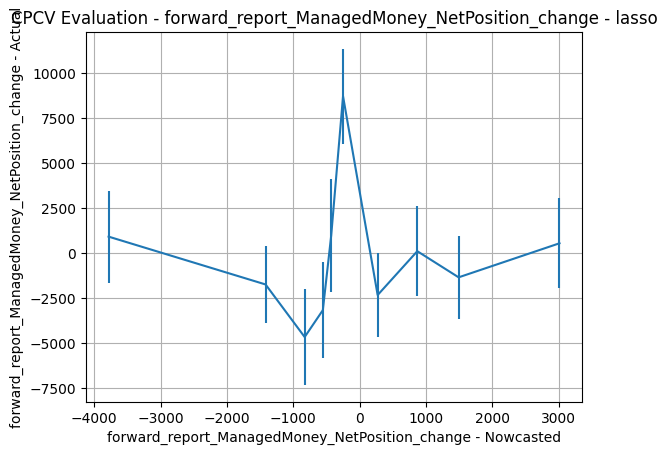

ridge: score=0.0179, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


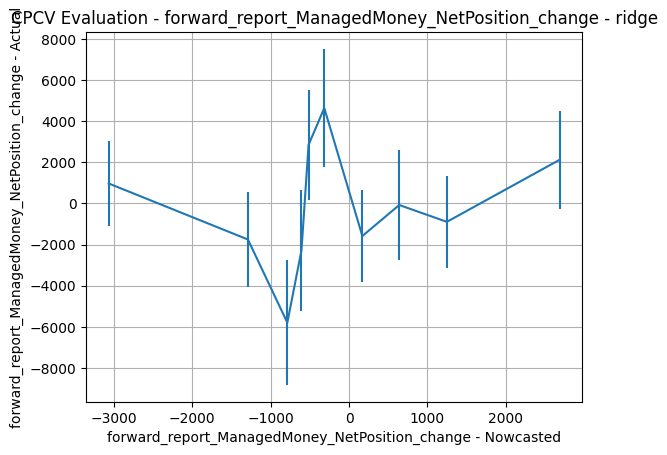

rf: score=0.1098, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}


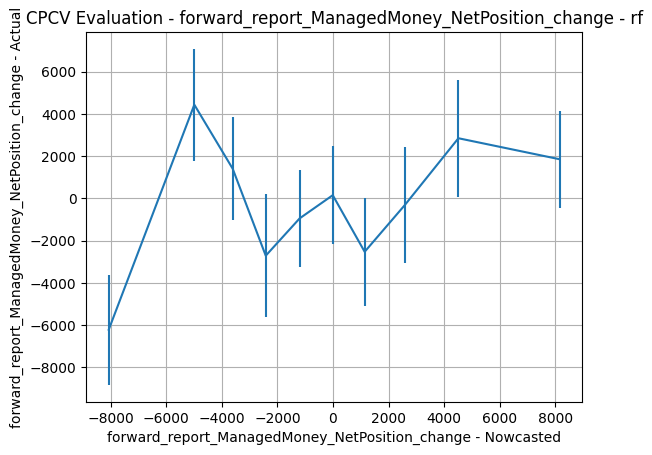

hgbm: score=0.0491, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


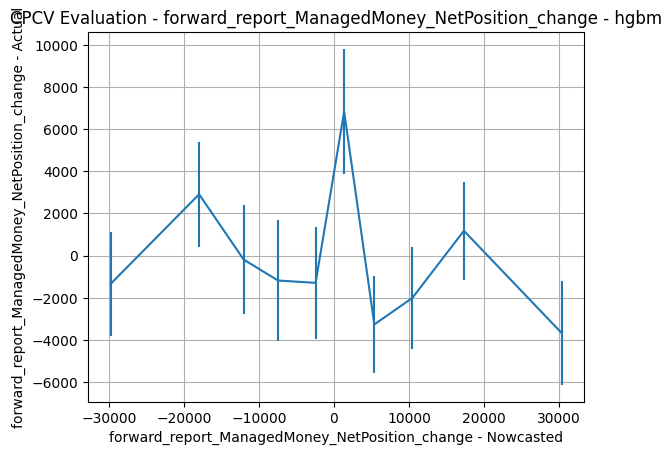

ols: score=0.0337, params={'model': 'ols'}
{}


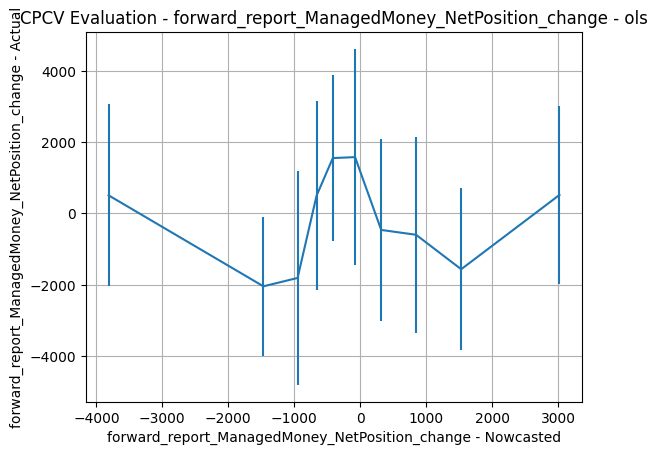

enet: score=-0.0208, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


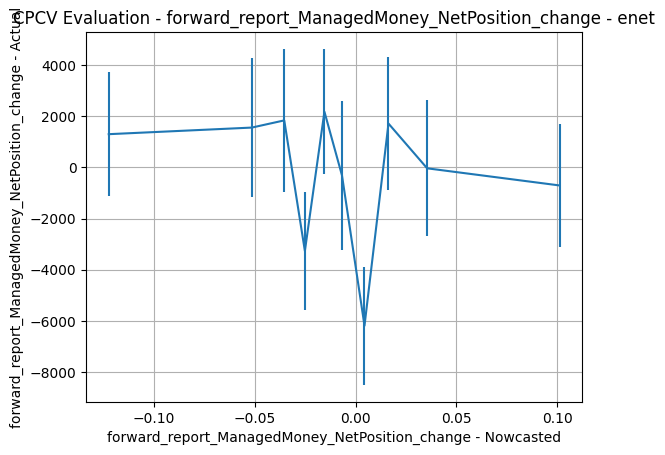

extra: score=0.1106, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


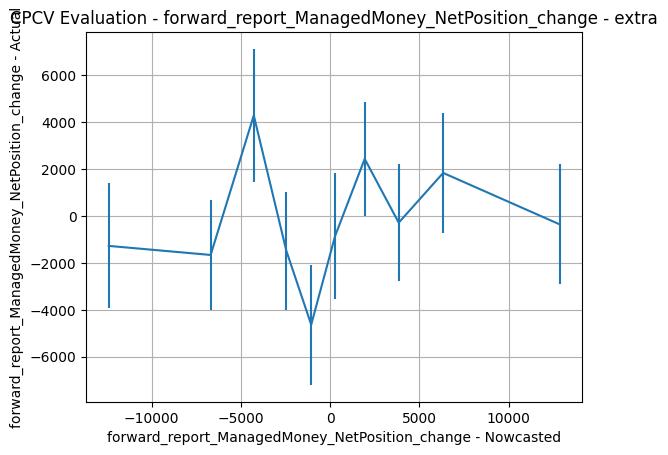

forward_report_ManagedMoney_LongPosition_change
lasso: score=0.0141, params={'model': 'lasso', 'alpha': 7.564898361977755}
{'alpha': 7.564898361977755}


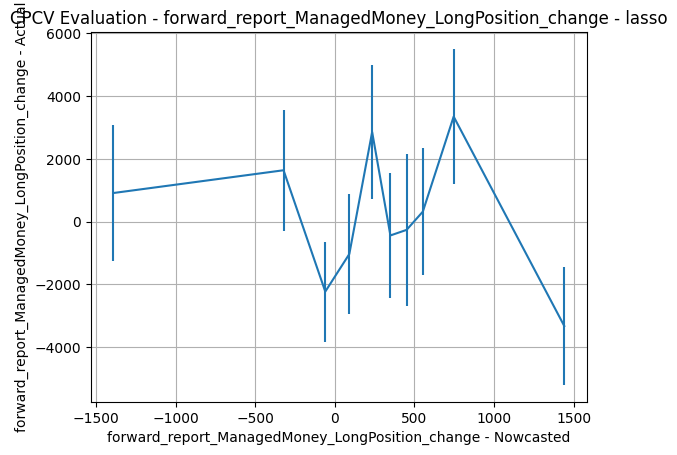

ridge: score=-0.0145, params={'model': 'ridge', 'alpha': 933.6044419798662}
{'alpha': 933.6044419798662}


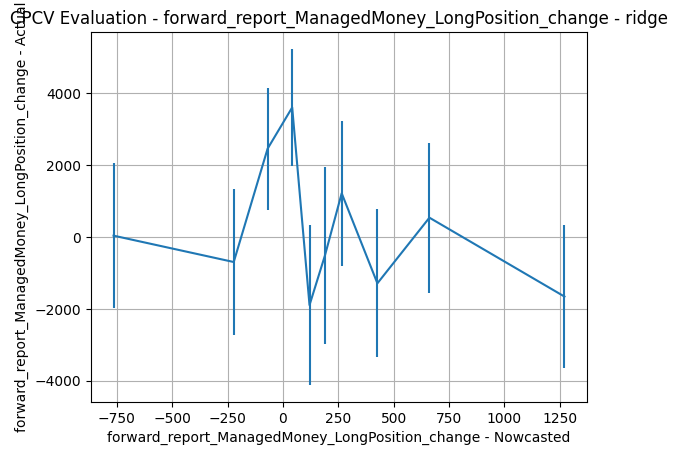

rf: score=0.0755, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


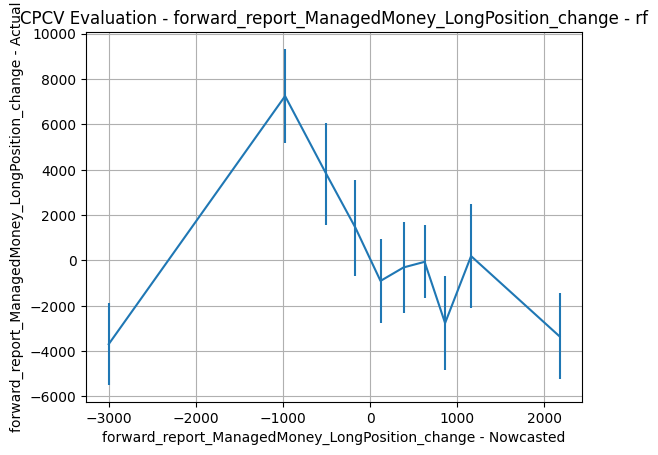

hgbm: score=0.0627, params={'model': 'hgbm', 'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.18297228851357758, 'max_leaf_nodes': 57}
{'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.18297228851357758, 'max_leaf_nodes': 57}


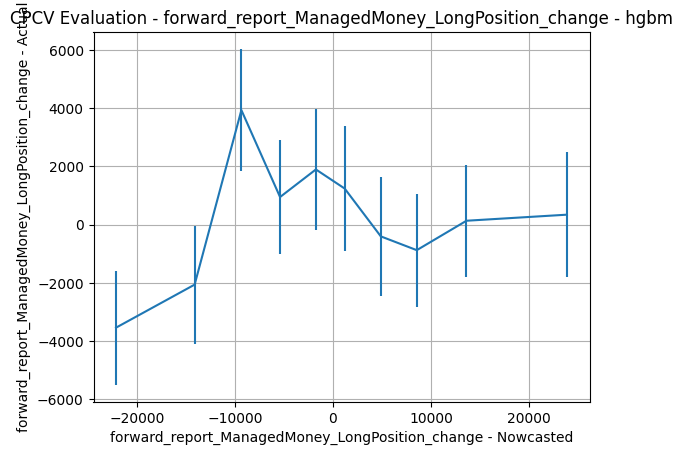

ols: score=0.0152, params={'model': 'ols'}
{}


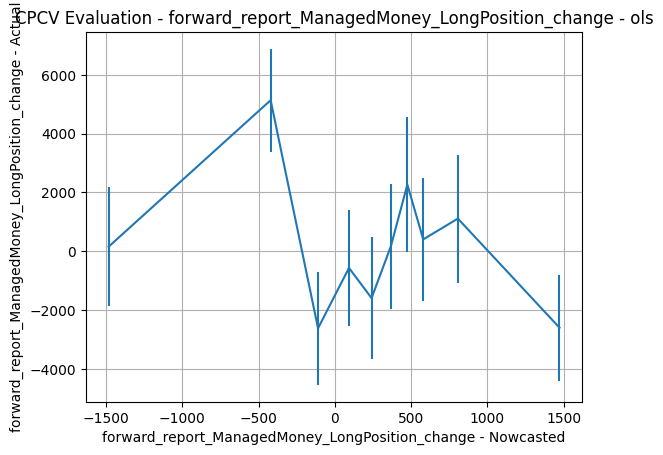

enet: score=-0.0304, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


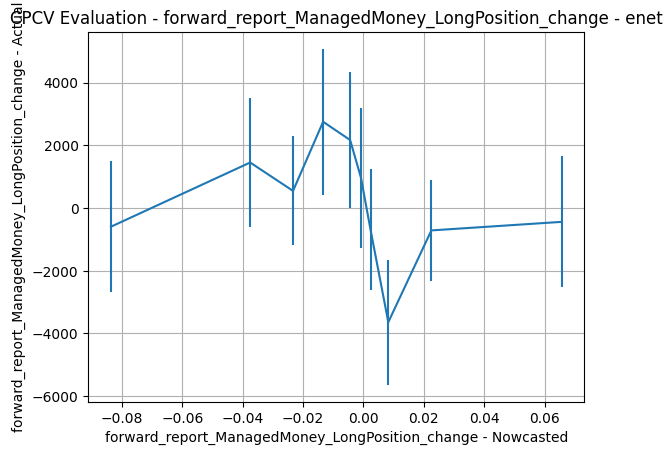

extra: score=0.0638, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


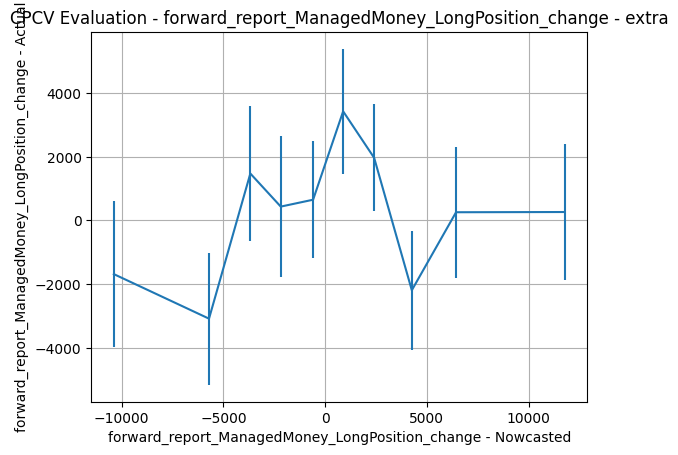

forward_report_ManagedMoney_ShortPosition_change
lasso: score=-0.0019, params={'model': 'lasso', 'alpha': 7.564898361977755}
{'alpha': 7.564898361977755}


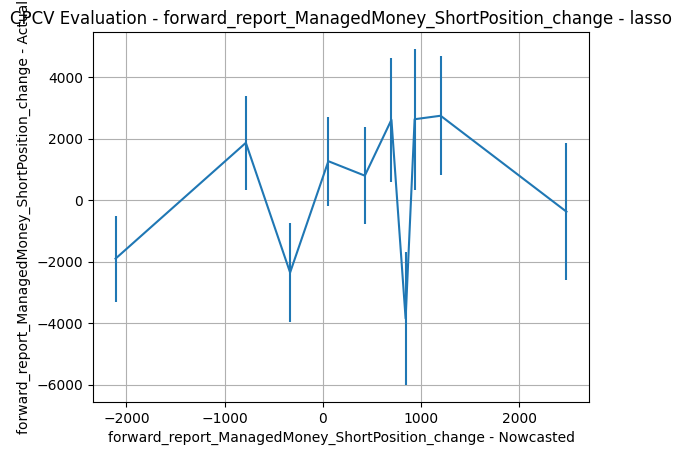

ridge: score=-0.0059, params={'model': 'ridge', 'alpha': 933.6044419798662}
{'alpha': 933.6044419798662}


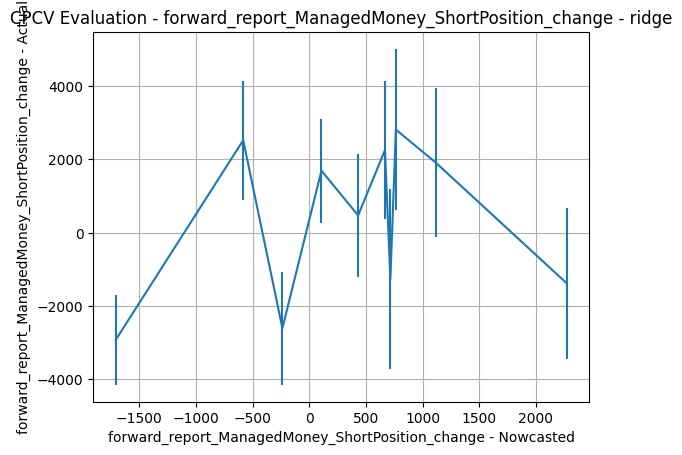

rf: score=0.1409, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 10, 'max_features': 'log2'}


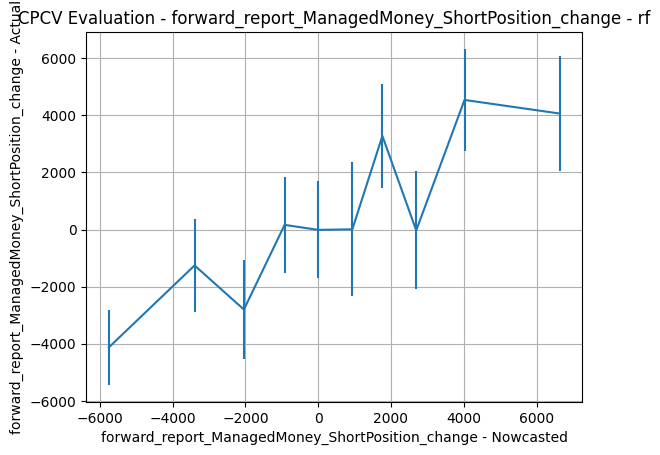

hgbm: score=0.1164, params={'model': 'hgbm', 'learning_rate': 0.29891102783900175, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.7132811229223122, 'max_leaf_nodes': 199}
{'learning_rate': 0.29891102783900175, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.7132811229223122, 'max_leaf_nodes': 199}


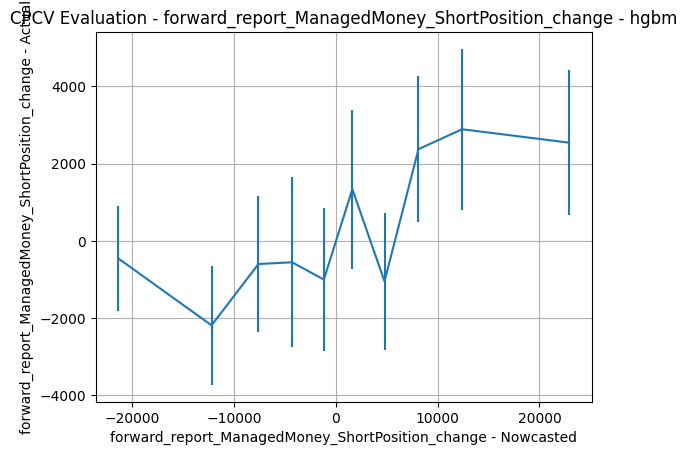

ols: score=-0.0016, params={'model': 'ols'}
{}


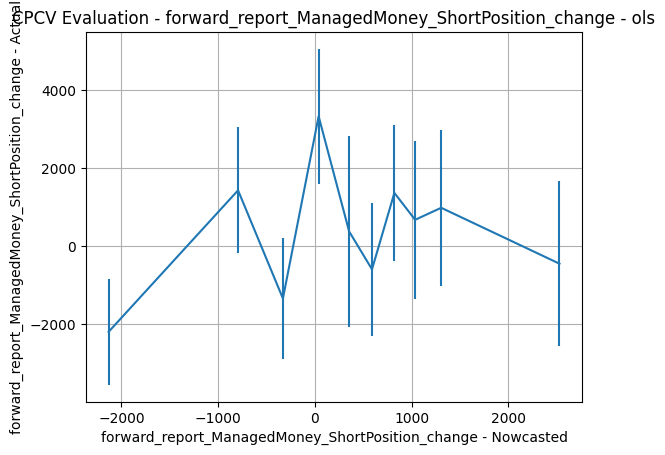

enet: score=-0.0183, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


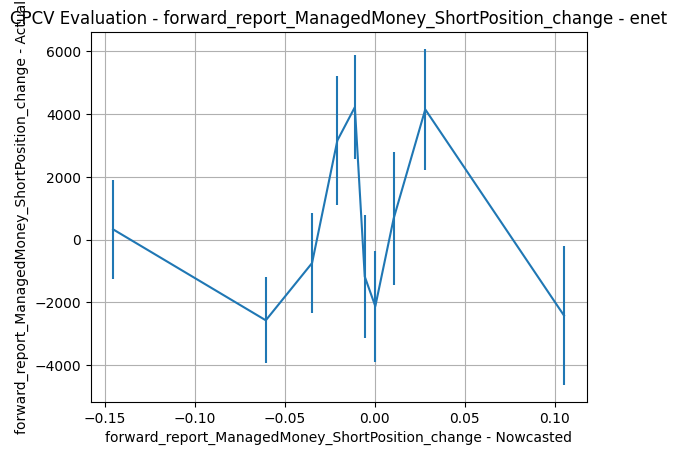

extra: score=0.1452, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


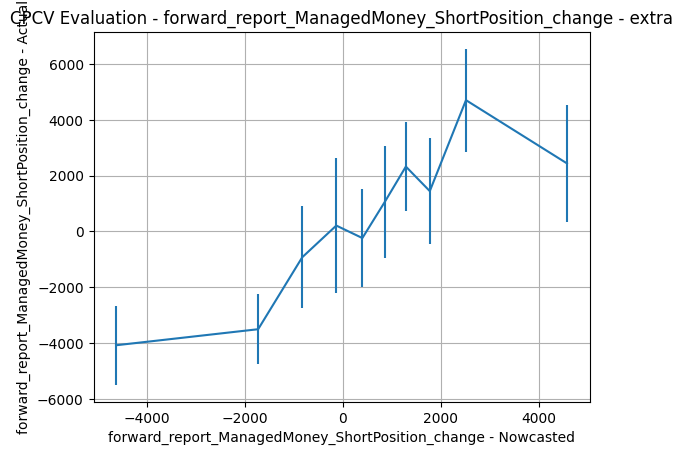

forward_ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0373, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


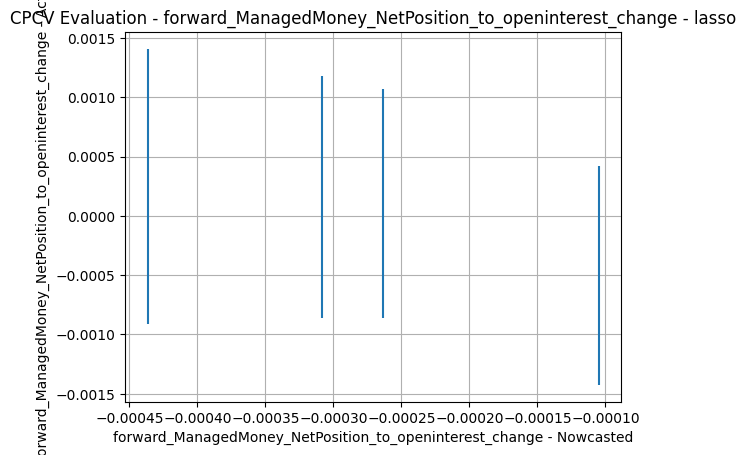

ridge: score=0.1398, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


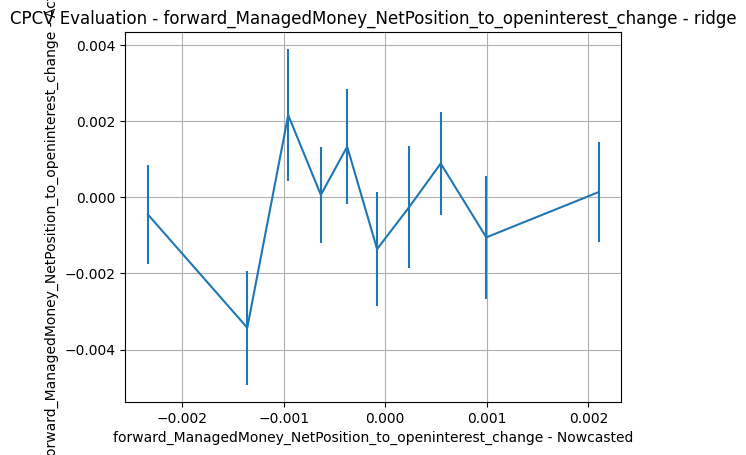

rf: score=0.2103, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}


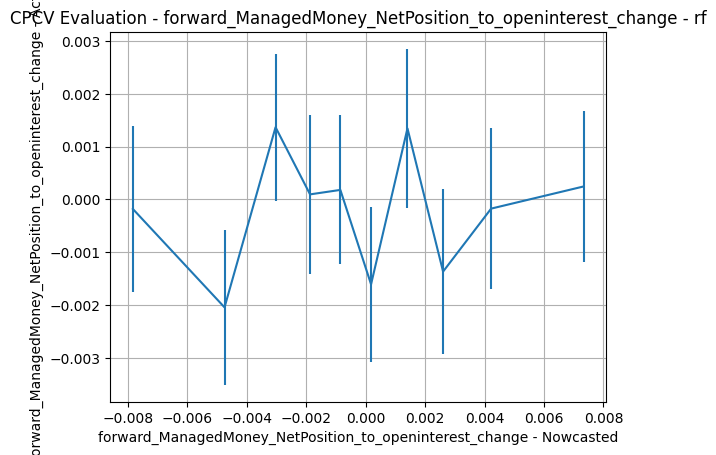

hgbm: score=0.1164, params={'model': 'hgbm', 'learning_rate': 0.28495208162491437, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.6733839041828327, 'max_leaf_nodes': 190}
{'learning_rate': 0.28495208162491437, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.6733839041828327, 'max_leaf_nodes': 190}


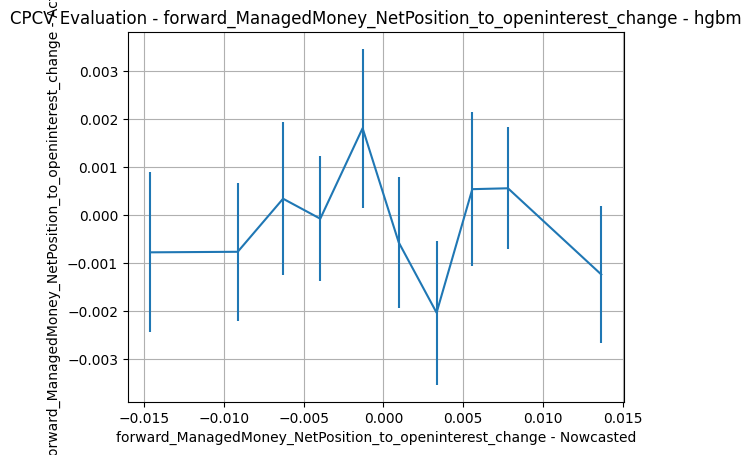

ols: score=0.1398, params={'model': 'ols'}
{}


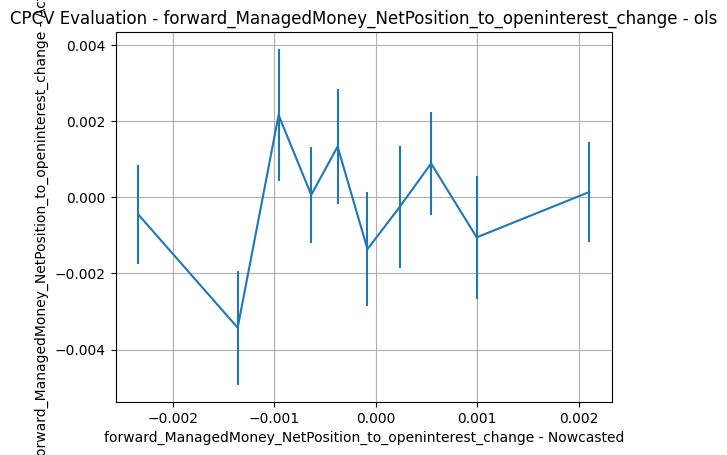

enet: score=-0.0323, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


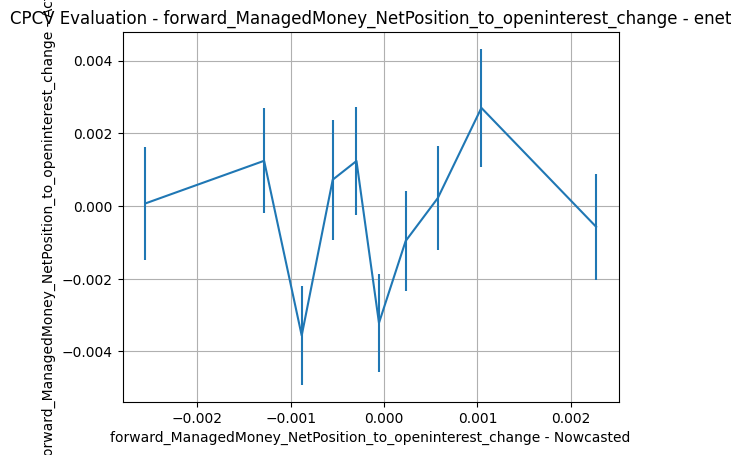

extra: score=0.1992, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


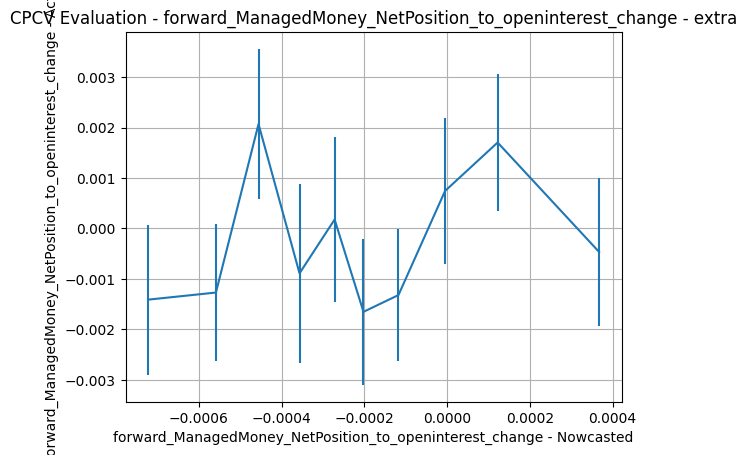

forward_ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0385, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


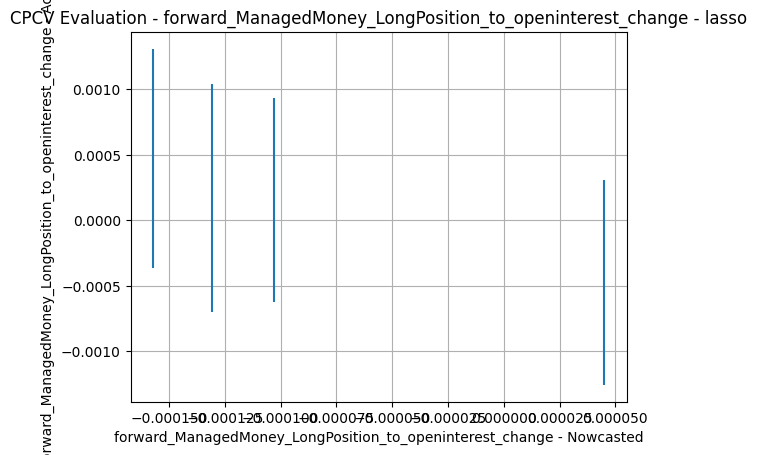

ridge: score=0.2056, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


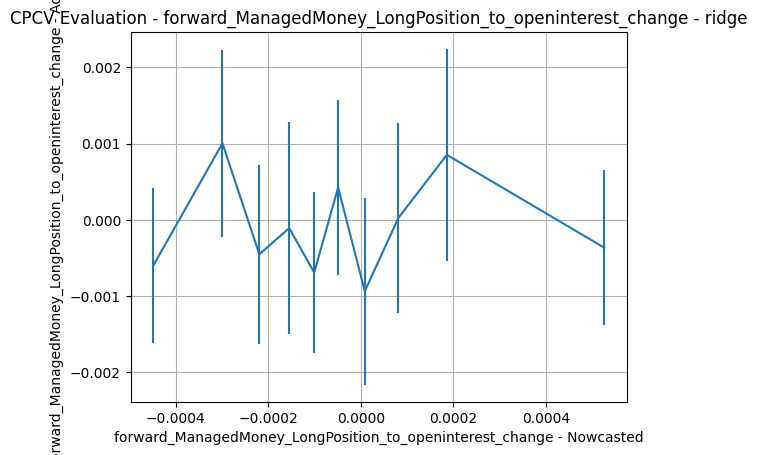

rf: score=0.2875, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


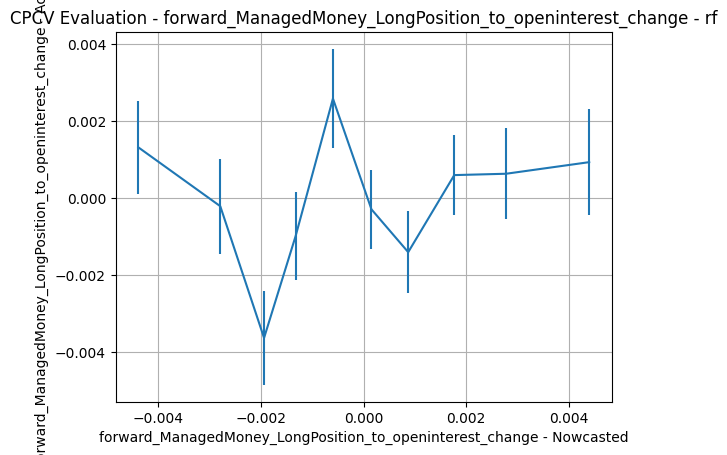

hgbm: score=0.1846, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


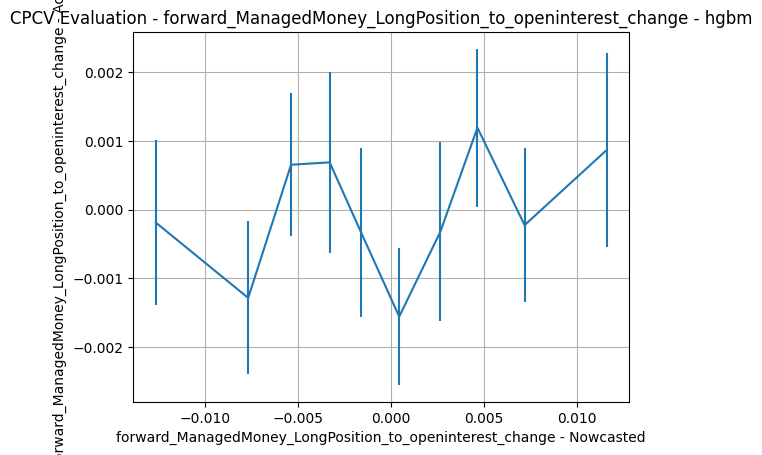

ols: score=0.2180, params={'model': 'ols'}
{}


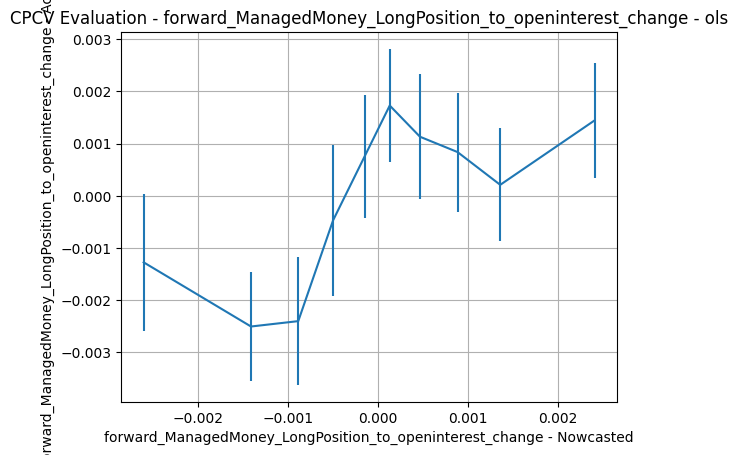

enet: score=-0.0374, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


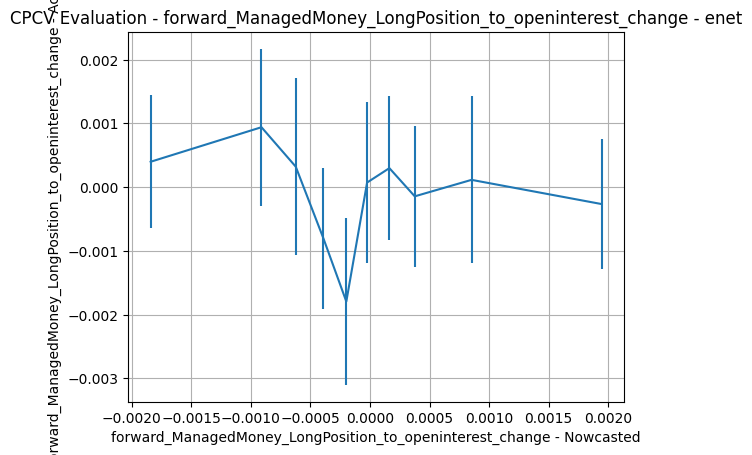

extra: score=0.2938, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


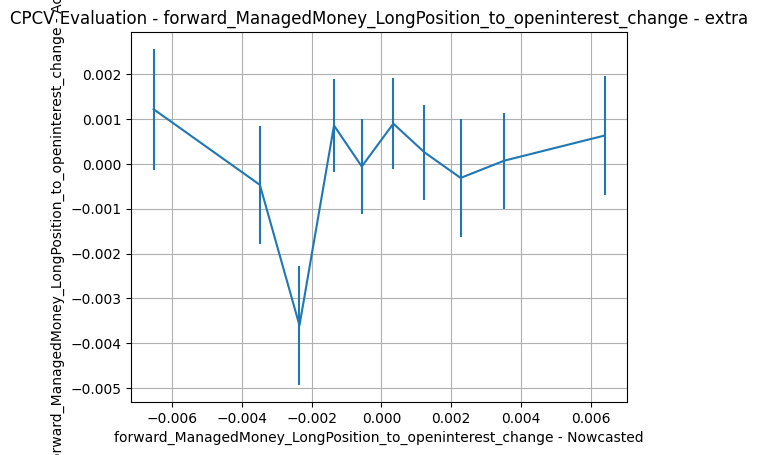

forward_ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0218, params={'model': 'lasso', 'alpha': 0.000864800028793422}
{'alpha': 0.000864800028793422}


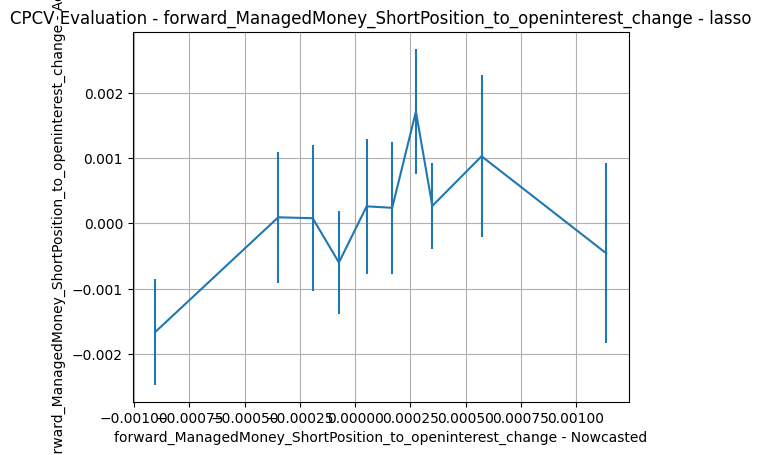

ridge: score=0.0249, params={'model': 'ridge', 'alpha': 334.17207377910296}
{'alpha': 334.17207377910296}


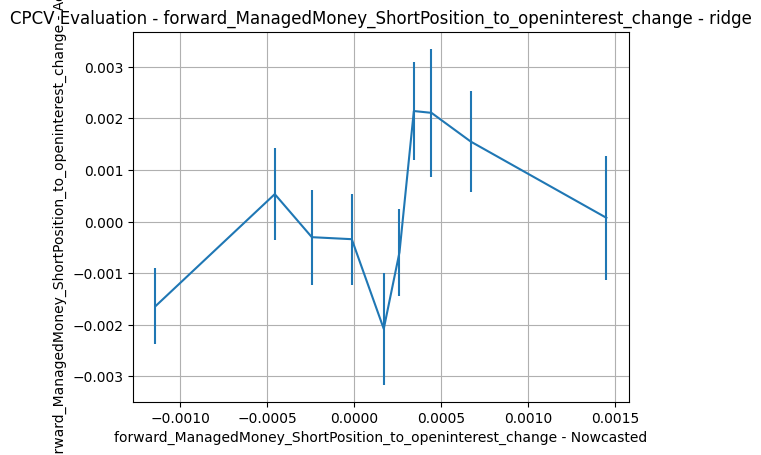

rf: score=0.1222, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}


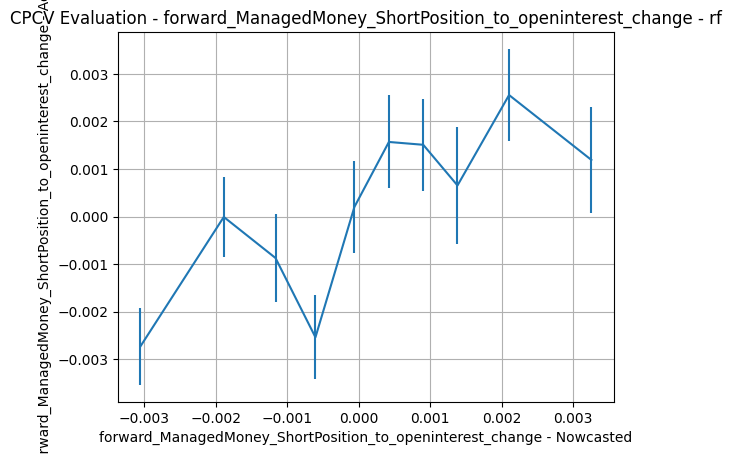

hgbm: score=0.1233, params={'model': 'hgbm', 'learning_rate': 0.0015078832504018204, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.6447945360070108, 'max_leaf_nodes': 33}
{'learning_rate': 0.0015078832504018204, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.6447945360070108, 'max_leaf_nodes': 33}


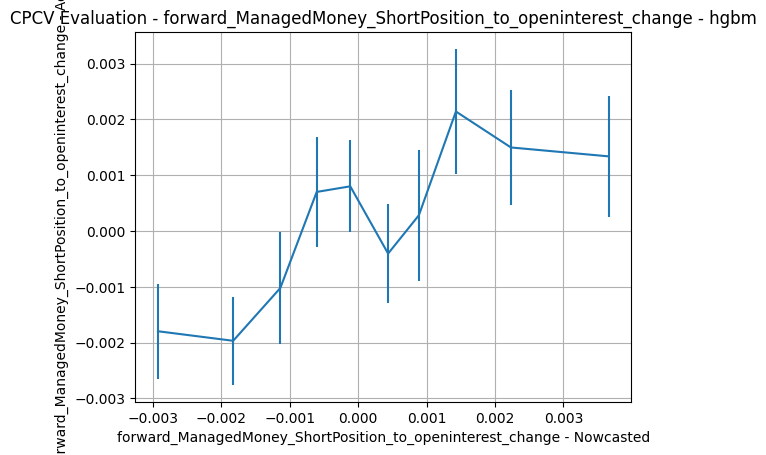

ols: score=0.0264, params={'model': 'ols'}
{}


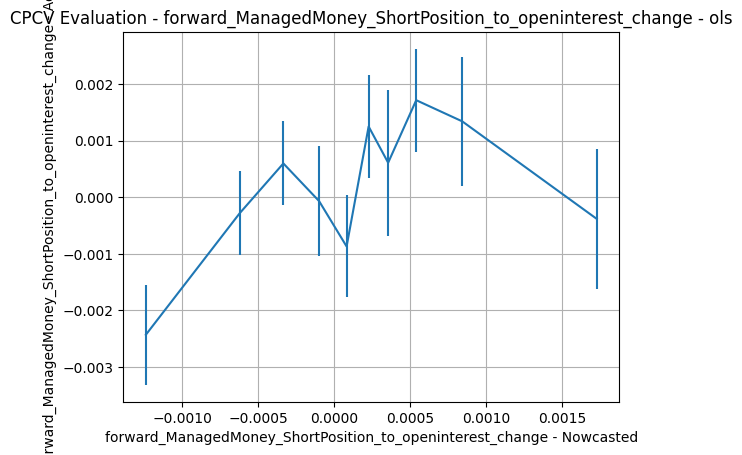

enet: score=-0.0194, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


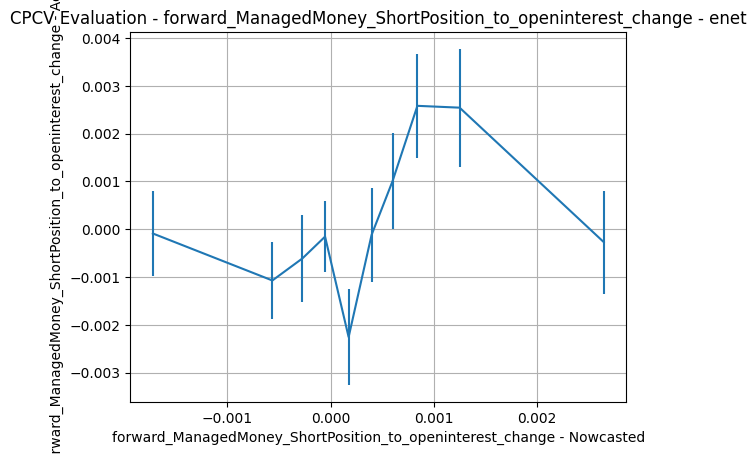

extra: score=0.1286, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


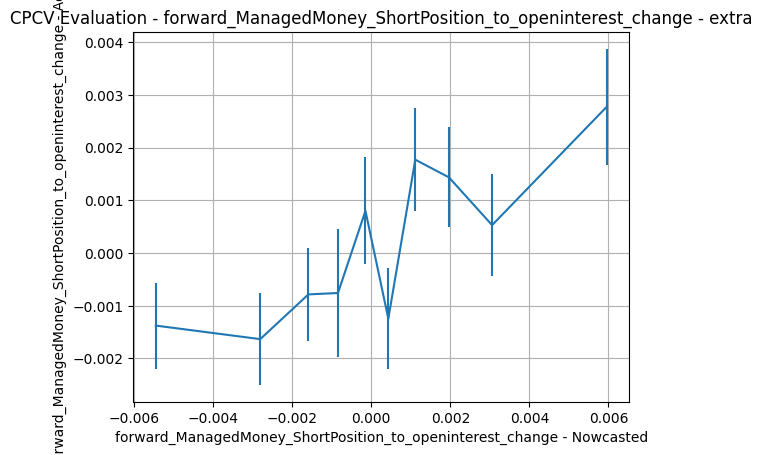

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_ManagedMoney_NetPosition_change,-0.011217,-0.005620,0.052604,-0.023211,-0.016585,-0.043454,0.010906
forward_report_ManagedMoney_LongPosition_change,-0.014097,-0.026773,-0.025841,0.034382,-0.022167,-0.024994,0.020054
forward_report_ManagedMoney_ShortPosition_change,-0.008538,-0.004896,0.131906,0.086760,-0.017169,-0.021033,0.137924
forward_ManagedMoney_NetPosition_to_openinterest_change,-0.037286,0.013153,0.015212,0.006960,0.013175,0.000038,0.027595
forward_ManagedMoney_LongPosition_to_openinterest_change,-0.040462,0.001429,0.026714,0.028460,0.098236,-0.001976,0.001358
forward_ManagedMoney_ShortPosition_to_openinterest_change,0.006767,0.019265,0.128907,0.123256,0.026351,0.028603,0.131199


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

forward_report_ManagedMoney_NetPosition_change
{'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}
forward_report_ManagedMoney_LongPosition_change
{'learning_rate': 0.2904065692376172, 'max_depth': 7, 'max_iter': 400, 'l2_regularization': 0.18297228851357758, 'max_leaf_nodes': 57}
forward_report_ManagedMoney_ShortPosition_change
{'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
forward_ManagedMoney_LongPosition_to_openinterest_change
{}
forward_ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 1000, 'max_depth': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_ManagedMoney_NetPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 600,
   'max_depth': 15,
   'min_samples_leaf': 8,
   'max_features': 'log2'}},
 'forward_report_ManagedMoney_LongPosition_change': {'model_name': 'hgbm',
  'params': {'learning_rate': 0.2904065692376172,
   'max_depth': 7,
   'max_iter': 400,
   'l2_regularization': 0.18297228851357758,
   'max_leaf_nodes': 57}},
 'forward_report_ManagedMoney_ShortPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 800,
   'max_depth': 9,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'ols',
  'params': {}},
 'forward_ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_esti

In [41]:
import json
with open("wti_cot_mm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)

In [42]:
## Cache: Model Selection CV Scores (forecast)
from src.settings import OUTPUT_DIR

forecast_output_dir = OUTPUT_DIR / "wti" / "mm" / "forecast"
forecast_output_dir.mkdir(parents=True, exist_ok=True)

model_selection_cache = {
    "ticker": "wti",
    "investor_type": "mm",
    "horizon": "forecast",
    "responses": {}
}

for response_name in responses_study:
    study = responses_study[response_name]
    best_per_model = responses_best_per_model[response_name]
    perf_map = response_performance_map[response_name]
    
    optuna_trials = []
    for trial in study.trials:
        if trial.state.name == "COMPLETE":
            optuna_trials.append({
                "number": trial.number,
                "model": trial.params.get("model", ""),
                "score": trial.value,
                "params": {k: v for k, v in trial.params.items()}
            })
    
    best_per_model_serializable = {}
    for model_name, info in best_per_model.items():
        best_per_model_serializable[model_name] = {
            "score": info["score"],
            "params": {k: v for k, v in info["params"].items() if k != "model"}
        }
    
    selected_model = final_selected_model_per_response[response_name]
    selected_params = final_selected_model_and_parameters_per_response[response_name]["params"]
    
    model_selection_cache["responses"][response_name] = {
        "cpcv_correlation_by_model": {k: float(v) for k, v in perf_map.items()},
        "best_per_model_params": best_per_model_serializable,
        "selected_model": selected_model,
        "selected_model_params": selected_params,
        "optuna_trial_history": optuna_trials
    }

with open(forecast_output_dir / "03_model_selection_cv_scores.json", "w") as f:
    json.dump(model_selection_cache, f, indent=2)

with open(forecast_output_dir / "03_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f, indent=2)

print(f"Saved 03_model_selection_cv_scores.json and 03_selected_model_by_response.json to {forecast_output_dir}")

Saved 03_model_selection_cv_scores.json and 03_selected_model_by_response.json to /Users/oualid/Documents/Projects/omroot_repos/COTAME/cache/output/wti/mm/forecast
